# **Optimization of Machine Downtime**

# **Introduction :**

This project focuses on analyzing key operational metrics in a manufacturing environment to identify areas for optimization and improvement. By leveraging statistical techniques and data-driven insights, the goal is to understand the performance of critical machine parameters, including hydraulic pressure, coolant pressure, spindle speed, torque, and cutting force. The analysis examines the distribution, variability, and trends in these parameters to provide strategic recommendations for enhancing efficiency, reducing downtime, and maintaining product quality. By addressing anomalies, monitoring key variables, and optimizing machine performance, this project aims to drive operational excellence and improve decision-making within the production process.



# **Purpose and Problem Statement :**

- ### **Problem Statement :**

  - Unplanned machine downtime in the production line is causing a significant loss in productivity and leading to missed production targets for a client specializing in vehicle fuel pumps.


- ### **Business Objective :**

  - Reduce unplanned machine downtime by optimizing operational parameters and predicting potential anomalies.


- ### **Constraints :**

  - Minimize maintenance costs while improving machine performance.

  - Balance operational efficiency without compromising product quality.


- ### **Success Criteria :**

  - **Business Success :** Reduce unplanned downtime by **at least 10%.**

  - **Economic Success :** Achieve cost savings of at least **$1M (1 Million Dollars).**



# **Data Overview**

### **Columns in Dataset :**


- **Date :** Record date of the measurement.

- **Machine_ID :** Unique identifier for machines in the production line.

- **Assembly_Line_No :** Corresponding production line number.

- **Downtime (minutes) :** Duration of downtime.

- **Hydraulic Pressure (bar) :** Pressure in the hydraulic system.

- **Coolant Pressure (bar) :** Pressure in the coolant system.

- **Air System Pressure (bar) :** Air pressure for pneumatic systems.

- **Coolant Temperature (°C) :** Temperature of the coolant fluid.

- **Hydraulic Oil Temperature (°C) :** Temperature of the hydraulic oil.

- **Spindle Bearing Temperature (°C) :** Heat in the spindle bearings.

- **Spindle Vibration (µm) :** Vibrational amplitude of the spindle.

- **Tool Vibration (µm) :** Vibrations in the tool system.

- **Spindle Speed (RPM) :** Rotational speed of the spindle.

- **Voltage (volts) :** Electrical voltage supplied to the machine.

- **Torque (Nm) :** Torque applied during machine operation.

- **Cutting Force (kN) :** Force exerted during material cutting.


## **Importing Libraries and Data**

In [73]:
# Importing Libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Importing data
data=pd.read_csv("/content/Machine Downtime.csv")

## **Understanding the data**

In [75]:
# Display the sample 5 rows of the dataset to get an overview of its structure and content
data.sample(5)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
1957,07-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,81.138221,3.140995,7.288459,25.6,40.1,38.4,0.915,28.490,22272.0,420.0,32.519299,1.87,No_Machine_Failure
2110,05-04-2022,Makino-L2-Unit1-2015,Shopfloor-L2,98.700000,6.863944,6.957722,26.5,48.8,36.0,1.923,34.870,18948.0,315.0,16.449554,3.55,Machine_Failure
2385,02-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,125.403423,5.473028,6.839304,10.6,42.5,35.5,1.269,37.846,21952.0,412.0,34.973004,3.18,No_Machine_Failure
788,21-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,120.057928,3.866647,5.563333,5.7,51.9,31.2,0.959,34.242,16198.0,377.0,22.137816,2.91,No_Machine_Failure
2060,06-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,98.370000,4.810821,6.287955,26.4,48.3,35.3,1.189,37.536,27613.0,376.0,15.900716,2.87,Machine_Failure


In [76]:
# copying the data
df_1=data.copy()

In [77]:
# Display a summary of the dataset, including the data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [78]:
# Descriptive summary
data.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [79]:
# Convert the 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Format the 'Date' column to 'YYYY-MM-DD'
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [80]:
# Cheacking null values
data.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(°C),16
Spindle_Bearing_Temperature(°C),7
Spindle_Vibration(µm),11


In [81]:
# Checking duplicate values
data.duplicated().sum()

0

In [82]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Downtime'], dtype='object')


In [83]:
# Identify categorical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

# Print the categorical columns
print("numerical columns:")
print(numerical_cols)

numerical columns:
Index(['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)',
       'Air_System_Pressure(bar)', 'Coolant_Temperature',
       'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
       'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
       'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'],
      dtype='object')


## **Intial Business Decision :**

In [84]:
# First Moment Business Decision

# for categorical columns

for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Get the first mode if multiple exist
    print(f"Mode of {col}: {mode_value}")

Mode of Date: 2022-03-15
Mode of Machine_ID: Makino-L1-Unit1-2013
Mode of Assembly_Line_No: Shopfloor-L1
Mode of Downtime: Machine_Failure


In [85]:
# shows only unique value list

for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"\nUnique values in {col}: {unique_values}")


Unique values in Date: ['2021-12-31' '2022-05-31' '2022-03-31' '2022-01-31' '2021-12-30'
 '2022-04-30' '2022-03-30' '2022-01-30' '2021-12-29' '2022-05-29'
 '2022-04-29' '2022-03-29' '2022-01-29' '2021-12-28' '2022-04-28'
 '2022-03-28' '2022-02-28' '2022-01-28' '2021-12-27' '2022-05-27'
 '2022-04-27' '2022-03-27' '2022-02-27' '2022-01-27' '2021-12-26'
 '2022-05-26' '2022-04-26' '2022-03-26' '2022-02-26' '2022-01-26'
 '2022-05-25' '2022-04-25' '2022-03-25' '2022-02-25' '2022-01-25'
 '2021-12-24' '2021-11-24' '2022-05-24' '2022-04-24' '2022-03-24'
 '2022-02-24' '2022-01-24' '2022-05-23' '2022-04-23' '2022-03-23'
 '2022-02-23' '2022-01-23' '2021-12-22' '2022-04-22' '2022-03-22'
 '2022-02-22' '2022-01-22' '2021-12-21' '2022-05-21' '2022-04-21'
 '2022-03-21' '2022-02-21' '2022-01-21' '2022-04-20' '2022-03-20'
 '2022-02-20' '2022-01-20' '2022-06-19' '2022-05-19' '2022-04-19'
 '2022-03-19' '2022-02-19' '2022-01-19' '2022-05-18' '2022-04-18'
 '2022-03-18' '2022-02-18' '2022-01-18' '2021-12-17'

In [86]:
# Count the occurrences of each unique value in the 'Machine_ID' column to analyze frequency distribution
data['Machine_ID'].value_counts()

,count
Machine_ID,
Makino-L1-Unit1-2013,874
Makino-L3-Unit1-2015,818
Makino-L2-Unit1-2015,808


In [87]:
# Count the occurrences of each unique value in the 'Date' column to analyze frequency distribution
time_series=data['Date'].value_counts()
print(time_series)

Date
2022-03-15    64
2022-03-19    48
2022-03-22    48
2022-03-23    40
2022-04-02    40
              ..
2021-12-08     1
2022-05-17     1
2022-01-15     1
2022-01-05     1
2022-06-04     1
Name: count, Length: 164, dtype: int64


In [88]:
# Count the occurrences of each unique value in the 'Assembly_Line_No' column to analyze frequency distribution
data['Assembly_Line_No'].value_counts()

,count
Assembly_Line_No,
Shopfloor-L1,874
Shopfloor-L3,818
Shopfloor-L2,808


In [89]:
# Count the occurrences of each unique value in the 'Downtime' column to analyze frequency distribution
data['Downtime'].value_counts()

,count
Downtime,
Machine_Failure,1265
No_Machine_Failure,1235


### **Business and Strategic Insights for Categorical Columns**

### **1. Date**

- **Mode :** 2022-03-15

- **Unique Values :** Multiple dates spanning different months and years.

- Insights:

 - **Seasonal trends :** Analyze whether downtime peaks in specific months or seasons. March 2022 being the mode may indicate a recurring issue or higher operational stress during that period.

 - **Preventive scheduling :** Implement scheduled maintenance around high-downtime periods like March.

 -  **Daily breakdown :** Examine day-of-week patterns (e.g., Mondays might have higher downtime due to machine startups after weekends).


### **2. Machine_ID**


- **Mode :** Makino-L1-Unit1-2013

- **Unique Values :** ['Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015', 'Makino-L2-Unit1-2015']

- **Insights :**

 - **Mode analysis :** Makino-L1-Unit1-2013 is the most frequently affected machine, potentially due to:
  
   - Age of the machine (manufactured in 2013).

   - Specific operational demands or inefficiencies.

- **Actionable steps :**

   - Prioritize maintenance or replacement of aging machines like Makino-L1-Unit1-2013.

   - Perform root-cause analysis specific to this machine to mitigate frequent downtime.

   - **Comparison :** Benchmark performance across different machine models (L1, L2, and L3) to identify the most reliable setups.


### **3. Assembly_Line_No**

- **Mode :** Shopfloor-L1

- **Unique Values :** ['Shopfloor-L1', 'Shopfloor-L3', 'Shopfloor-L2']

- **Insights :**

 - **Line reliability :** Frequent downtime on Shopfloor-L1 may indicate:

   - Higher production demands or utilization.

   - Suboptimal processes or bottlenecks in the assembly workflow.

- **Actionable steps :**

   - Evaluate workload distribution across lines to balance operational pressure.

   - Investigate whether certain lines consistently face machine failures and implement targeted process improvements.


### **4. Downtime**


- **Mode :** Machine_Failure

- **Unique Values :** ['Machine_Failure', 'No_Machine_Failure']

- **Insights :**

 - **High incidence of machine failures :**

   - Focus on preventive and predictive maintenance strategies to minimize failures.

   - Analyze which numerical factors (e.g., hydraulic pressure, spindle vibration) are most correlated with machine failures.

 - **Categorical association :**

   - Identify which machines and assembly lines are most associated with Machine_Failure events.

   - Develop targeted interventions (e.g., better operator training, process redesign).


In [90]:
# First Moment Business Decision: Analyze the central tendency of numerical columns
for col in numerical_cols:
    # Calculate the mean for columns without significant outliers
    mean_value = data[col].mean()
    print(f"Mean of {col}: {round(mean_value, 2)}")

    # Calculate the median for columns with potential outliers
    median_value = data[col].median()
    print(f"Median of {col}: {round(median_value, 2)}")
    print("\n")


Mean of Hydraulic_Pressure(bar): 101.41
Median of Hydraulic_Pressure(bar): 96.76


Mean of Coolant_Pressure(bar): 4.95
Median of Coolant_Pressure(bar): 4.94


Mean of Air_System_Pressure(bar): 6.5
Median of Air_System_Pressure(bar): 6.51


Mean of Coolant_Temperature: 18.56
Median of Coolant_Temperature: 21.2


Mean of Hydraulic_Oil_Temperature(°C): 47.62
Median of Hydraulic_Oil_Temperature(°C): 47.7


Mean of Spindle_Bearing_Temperature(°C): 35.06
Median of Spindle_Bearing_Temperature(°C): 35.1


Mean of Spindle_Vibration(µm): 1.01
Median of Spindle_Vibration(µm): 1.01


Mean of Tool_Vibration(µm): 25.41
Median of Tool_Vibration(µm): 25.46


Mean of Spindle_Speed(RPM): 20274.79
Median of Spindle_Speed(RPM): 20137.5


Mean of Voltage(volts): 349.0
Median of Voltage(volts): 349.0


Mean of Torque(Nm): 25.23
Median of Torque(Nm): 24.65


Mean of Cutting(kN): 2.78
Median of Cutting(kN): 2.78




In [91]:
# Second Moment Business Decision: Analyze the spread and variability of numerical columns
for cols in numerical_cols:
    # Calculate the standard deviation to measure data dispersion
    std_value = data[cols].std()
    print(f"Standard Deviation of {cols}: {round(std_value, 2)}")

    # Determine the minimum value in the column
    min_value = data[cols].min()
    print(f"Minimum of {cols}: {round(min_value, 2)}")

    # Determine the maximum value in the column
    max_value = data[cols].max()
    print(f"Maximum of {cols}: {round(max_value, 2)}")

    # Calculate the variance to understand the spread of data points
    var_value = data[cols].var()
    print(f"Variance of {cols}: {round(var_value, 2)}")

    # Calculate the range (difference between max and min values) to analyze data spread
    range_value = data[cols].max() - data[cols].min()
    print(f"Range of {cols}: {round(range_value, 2)}")

    print("\n")


Standard Deviation of Hydraulic_Pressure(bar): 30.29
Minimum of Hydraulic_Pressure(bar): -14.33
Maximum of Hydraulic_Pressure(bar): 191.0
Variance of Hydraulic_Pressure(bar): 917.44
Range of Hydraulic_Pressure(bar): 205.33


Standard Deviation of Coolant_Pressure(bar): 1.0
Minimum of Coolant_Pressure(bar): 0.32
Maximum of Coolant_Pressure(bar): 11.35
Variance of Coolant_Pressure(bar): 0.99
Range of Coolant_Pressure(bar): 11.02


Standard Deviation of Air_System_Pressure(bar): 0.41
Minimum of Air_System_Pressure(bar): 5.06
Maximum of Air_System_Pressure(bar): 7.97
Variance of Air_System_Pressure(bar): 0.17
Range of Air_System_Pressure(bar): 2.91


Standard Deviation of Coolant_Temperature: 8.55
Minimum of Coolant_Temperature: 4.1
Maximum of Coolant_Temperature: 98.2
Variance of Coolant_Temperature: 73.18
Range of Coolant_Temperature: 94.1


Standard Deviation of Hydraulic_Oil_Temperature(°C): 3.77
Minimum of Hydraulic_Oil_Temperature(°C): 35.2
Maximum of Hydraulic_Oil_Temperature(°C): 6

In [92]:
# Third Moment Business Decision: Analyze the skewness (asymmetry) of numerical columns
for cols in numerical_cols:
    # Calculate and print the skewness to understand the asymmetry in data distribution
    print(f"Skewness of {cols}: {round(data[cols].skew(), 2)}")
    print("\n")


Skewness of Hydraulic_Pressure(bar): 0.2


Skewness of Coolant_Pressure(bar): 0.15


Skewness of Air_System_Pressure(bar): -0.05


Skewness of Coolant_Temperature: 0.11


Skewness of Hydraulic_Oil_Temperature(°C): -0.0


Skewness of Spindle_Bearing_Temperature(°C): -0.04


Skewness of Spindle_Vibration(µm): 0.0


Skewness of Tool_Vibration(µm): -0.06


Skewness of Spindle_Speed(RPM): -0.17


Skewness of Voltage(volts): -0.03


Skewness of Torque(Nm): 0.03


Skewness of Cutting(kN): 0.11




In [93]:
# Fourth Moment Business Decision: Analyze the kurtosis (tailedness) of numerical columns
for cols in numerical_cols:
    # Calculate and print the kurtosis to understand the data's tail behavior and outlier propensity
    print(f"Kurtosis of {cols}: {round(data[cols].kurtosis(), 2)}")
    print("\n")


Kurtosis of Hydraulic_Pressure(bar): -0.92


Kurtosis of Coolant_Pressure(bar): 1.17


Kurtosis of Air_System_Pressure(bar): -0.0


Kurtosis of Coolant_Temperature: 1.56


Kurtosis of Hydraulic_Oil_Temperature(°C): 0.04


Kurtosis of Spindle_Bearing_Temperature(°C): -0.04


Kurtosis of Spindle_Vibration(µm): -0.02


Kurtosis of Tool_Vibration(µm): 0.01


Kurtosis of Spindle_Speed(RPM): 1.34


Kurtosis of Voltage(volts): -0.09


Kurtosis of Torque(Nm): -0.47


Kurtosis of Cutting(kN): -1.09





# **Strategic Insights :**

#### **Hydraulic Pressure**

1. **Anomalies Detected**:
   - The minimum value (`-14.33 bar`) is invalid. Investigate and clean data, and recalibrate sensors to avoid inaccuracies.

2. **High Variability**:
   - A wide range (`205.33 bar`) and high standard deviation (`30.29 bar`) suggest inconsistent pressure. Stabilize operations to prevent stress on machines.

3. **Slight Positive Skewness**:
   - Occasional high pressures may indicate specific operational issues. Monitor peaks and optimize load distribution.

4. **Flatter Distribution (Low Kurtosis)**:
   - Pressure readings are mostly consistent, indicating reliable operations, but anomalies should be addressed to maintain quality.

**Strategic Insights :**

Strategic Insights:

- **Anomalies Detected:** The minimum value of -14.33 bar is invalid, indicating a potential sensor issue or incorrect data entry. Immediate attention is required to recalibrate sensors and clean the data to ensure accuracy.

- **High Variability:** The wide range (205.33 bar) and significant standard deviation (30.29 bar) reflect considerable fluctuation in hydraulic pressure. Operational stability should be prioritized to reduce these fluctuations and mitigate stress on equipment.

- **Slight Positive Skewness:** The skewness value of 0.2 suggests that there are occasional spikes in hydraulic pressure, potentially caused by specific operational issues. Monitoring and controlling these peak pressures can help avoid potential system damage.

- **Flatter Distribution (Low Kurtosis):** With a kurtosis value of -0.92, the distribution of pressure readings is relatively flat, indicating more uniformity and fewer extreme outliers. While this reflects reliability in operations, regular checks for any pressure anomalies are advised to maintain quality.


---------------------


#### **Coolant Pressure (bar):**
- **Mean vs. Median**: The mean (4.95) is close to the median (4.94), indicating a nearly symmetric distribution.
- **Spread**: The standard deviation (1.0) and range (11.03) suggest variability is low but outliers could exist.

- **Shape**: Skewness (0.15) indicates slight positive skew, and kurtosis (1.17) shows light-tailed distribution.

**Strategic Insights :**

- **Symmetry in Distribution:** The close values of mean (4.95) and median (4.94) indicate a nearly symmetric distribution of coolant pressure. This suggests the system is generally stable, which is favorable for operational efficiency.

- **Low Variability:** The standard deviation (1.0) and range (11.03) are relatively low, implying that coolant pressure is consistent. However, any slight fluctuations could still impact system performance and should be monitored.

- **Slight Positive Skewness:** A skewness of 0.15 indicates that there are occasional high pressure readings, which could be indicative of system strain. Regular monitoring and adjustments are needed to avoid potential overheating or pressure damage.

- **Light-Tailed Distribution:** The kurtosis value of 1.17 suggests a light-tailed distribution, which indicates that outliers are infrequent. However, continued vigilance is necessary to detect any abnormal spikes.


---------------------

#### **Air System Pressure (bar):**
- **Mean vs. Median**: Mean (6.5) and median (6.51) align closely, suggesting symmetry.

- **Spread**: Low variance (0.17) and range (2.91) show consistent readings across the system.
- **Shape**: Skewness (-0.05) and kurtosis (-0.0) confirm the distribution is symmetric and normal-like.


**Strategic Insights :**

- **Balanced Distribution:** The mean and median values are closely aligned, indicating symmetry and stable air system pressure across the process.

- **Minimal Variability:** The low standard deviation (0.41) and range (2.91) point to consistent air pressure in the system, which is critical for maintaining efficiency and avoiding potential faults.

- **Symmetric Distribution:** With skewness near 0 and kurtosis of -0.0, the air system pressure follows a nearly normal distribution, meaning it's operating within optimal parameters with no significant outliers.


---------------------


#### **Coolant Temperature:**
- **Mean vs. Median**: Mean (18.56) and median (21.2) diverge slightly, indicating possible skewness.
- **Spread**: High range (94.1) and standard deviation (8.55) imply broad variability.

- **Shape**: Skewness (0.11) suggests a slightly right-skewed distribution; kurtosis (1.56) implies a light-tailed profile.


**Strategic Insights :**

- **Slight Discrepancy between Mean and Median :** The mean and median are not perfectly aligned, suggesting a slightly skewed distribution of coolant temperature, which might be due to occasional extreme high temperatures.

- **High Variability :** The large range (94.1) and high standard deviation (8.55) highlight significant fluctuations in temperature. This variability may indicate inefficiencies in the cooling system that need addressing to maintain stable operations.

- **Slight Positive Skewness :** The positive skewness (0.11) suggests that temperatures are more often on the lower side but occasionally spike. These spikes should be monitored to avoid overheating and equipment damage.

- **Light-Tailed Distribution :** The kurtosis value of 1.56 indicates that the data has light tails, suggesting that extreme temperature values are rare but should still be carefully monitored.

---------------------

#### **Hydraulic Oil Temperature (°C):**
- **Mean vs. Median**: Mean (47.62) and median (47.7) are close, indicating symmetry.
- **Spread**: Moderate range (26.2) and variance (14.2) suggest consistent temperature readings.
- **Shape**: Skewness (-0.0) and kurtosis (0.04) confirm near-normal distribution.


**Strategic Insights :**

- **Symmetry in Temperature :** The close alignment between mean (47.62) and median (47.7) indicates that the hydraulic oil temperature is fairly stable and within an expected range.

- **Moderate Variability :** A range of 26.2 and standard deviation of 3.77 suggest some fluctuations in temperature, which may indicate that cooling or heating processes are not entirely consistent.

- **Near-Normal Distribution :** With skewness of -0.0 and kurtosis of 0.04, the temperature distribution is nearly normal, indicating stable and predictable performance.

---------------------


#### **Spindle Bearing Temperature (°C):**
- **Mean vs. Median**: Nearly identical values (mean: 35.06, median: 35.1) suggest symmetry.
- **Spread**: Moderate variance (14.17) and range (26.9) indicate controlled temperature fluctuations.
- **Shape**: Skewness (-0.04) and kurtosis (-0.04) confirm a balanced distribution.


**Strategic Insights :**

- **Symmetry in Temperature :** The mean and median values are nearly identical, which suggests that the spindle bearing temperature is stable and operating within a predictable range.

- **Moderate Variability :** The standard deviation of 3.76 and range of 26.9 indicate that there is some fluctuation, which may require monitoring to ensure that bearings do not overheat and cause failure.

- **Balanced Distribution :** Both skewness (-0.04) and kurtosis (-0.04) suggest that the spindle bearing temperature follows a balanced, nearly normal distribution.


---------------------


#### **Spindle Vibration (µm):**
- **Mean vs. Median**: Identical mean and median (1.01) suggest uniform performance.
- **Spread**: Narrow range (2.46) and low variance (0.12) highlight minimal vibration.
- **Shape**: Skewness (0.0) and kurtosis (-0.02) reinforce a symmetric distribution.


**Strategic Insights :**

- **Stable Vibration :** The identical mean and median values indicate consistent performance with minimal vibration, which is ideal for operational efficiency.

- **Minimal Variability :** The low standard deviation (0.34) and narrow range (2.46) suggest that spindle vibration is well-controlled, reducing the likelihood of mechanical issues.

- **Normal Distribution :** Both skewness (0.0) and kurtosis (-0.02) confirm that vibration data follows a normal distribution, supporting stable and predictable operations.

---------------------


#### **Tool Vibration (µm):**
- **Mean vs. Median**: Close values (mean: 25.41, median: 25.45) indicate minor skewness.

- **Spread**: Larger range (43.56) and higher variance (41.44) suggest some outliers.
- **Shape**: Skewness (-0.06) and kurtosis (0.01) show symmetry with potential outliers.


**Strategic Insights :**


- **Close Mean and Median :** The close values of mean and median indicate that the distribution of tool vibration is relatively balanced, though there might be some extreme values.

- **High Variability :** The large standard deviation (6.44) and wide range (43.56) suggest significant fluctuation in tool vibration, potentially due to operational inconsistencies or worn-out components.

- **Nearly Symmetric Distribution :** The skewness (-0.06) and kurtosis (0.01) indicate a symmetric distribution with a potential for outliers. Further investigation into extreme vibrations is recommended.

---------------------

#### **Spindle Speed (RPM):**
- **Mean vs. Median**: Close alignment (mean: 20274.79, median: 20137.5) indicates balance.
- **Spread**: High range (27,957.0) and variance (14,842,989.51) reveal significant variability.

- **Shape**: Slight negative skew (-0.17); light-tailed distribution with kurtosis (1.34).


**Strategic Insights :**


- **Close Mean and Median :** The spindle speed data is balanced with very little skew, indicating stable operating speeds.


- **High Variability :** The large range (27957.0) and variance (14842989.51) indicate substantial variability in spindle speeds, which may be due to operational cycles or variable loads.

- **Slight Negative Skew :** The slight negative skewness (-0.17) suggests that the speeds are slightly more clustered at the lower end, but this is not significant enough to impact overall operations.

---------------------

#### **Voltage (volts):**
- **Mean vs. Median**: Mean and median (both 349.0) confirm no skew.
- **Spread**: Moderate variance (2,058.98) and range (277.0) highlight stable readings.
- **Shape**: Skewness (-0.03) and kurtosis (-0.09) validate symmetry and normality.


**Strategic Insights :**

- **Stable Voltage :** The identical mean and median indicate stable voltage levels across the system.

- **Moderate Variability :** The standard deviation (45.38) and range (277.0) reflect some variability, though the voltage is generally consistent.

- **Near-Normal Distribution :** Skewness (-0.03) and kurtosis (-0.09) confirm a nearly normal distribution, with no significant outliers to cause concern.

---------------------

#### **Torque (Nm):**
- **Mean vs. Median**: Similar values (mean: 25.23, median: 24.65) suggest slight skew.

- **Spread**: Range (55.55) and variance (37.68) indicate variability.
- **Shape**: Skewness (0.03) confirms slight right skew; kurtosis (-0.47) implies flatness.


**Strategic Insights :**

- **Slight Positive Skew :** The skewness value of 0.03 suggests a small tendency for higher torque values, but it's not significant.

- **High Variability :** The range (55.55) and standard deviation (6.14) suggest that torque levels can vary significantly. Monitoring is necessary to avoid excessive torque that could damage equipment.

- **Moderate Kurtosis :** The kurtosis value of -0.47 indicates a slightly flat distribution, which may mean occasional extreme torque values, requiring attention to avoid mechanical failures.

---------------------

#### **Cutting (kN):**
- **Mean vs. Median**: Equal mean and median (2.78) denote symmetry.

- **Spread**: Low range (2.13) and variance (0.38) show consistency.

- **Shape**: Skewness (0.11) indicates mild positive skew; kurtosis (-1.09) shows a flat profile.

**Strategic Insights :**

- **Consistency :** Equal mean and median (2.78) with low standard deviation (0.62) and range (2.13) show stable cutting force, ensuring reliable operations.

- **Slight Positive Skew :** Skewness (0.11) indicates occasional increases in cutting force; monitoring these peaks can prevent damage and optimize performance.

- **Low Variability :** Low variance (0.38) suggests predictable cutting force, supporting optimized production and reduced downtime.

- **Flat Distribution :** Negative kurtosis (-1.09) reflects fewer outliers, promoting stable operations and high product quality.

- **Efficiency and Quality :** Consistent cutting force helps maintain quality, reduces tool wear, and enhances operational efficiency.







## **Data Preprocessing :**



In [94]:
# Count the number of missing (null) values in each column to identify data quality issues
data.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(°C),16
Spindle_Bearing_Temperature(°C),7
Spindle_Vibration(µm),11


In [95]:
# Get the dimensions of the dataset (number of rows and columns) to understand its size
data.shape

(2500, 16)

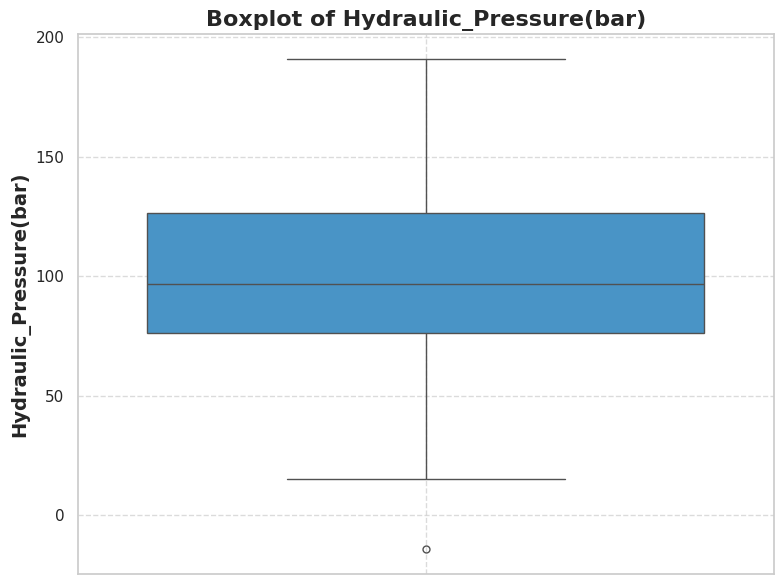

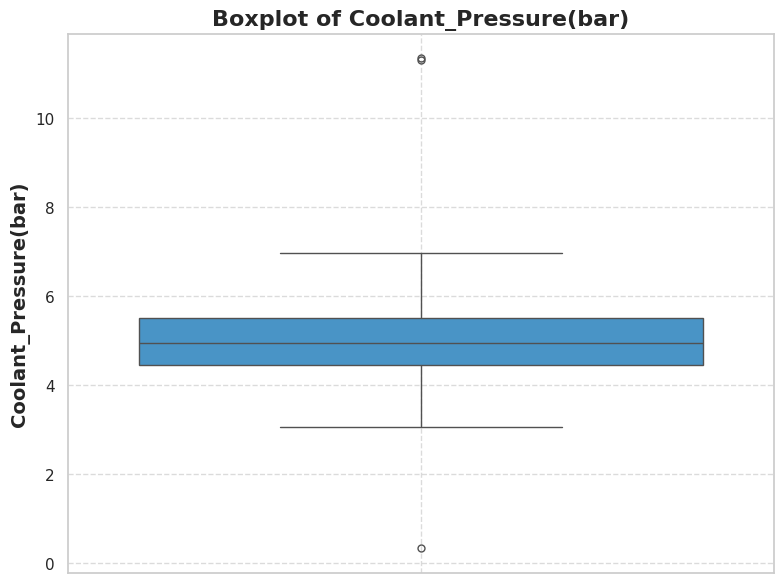

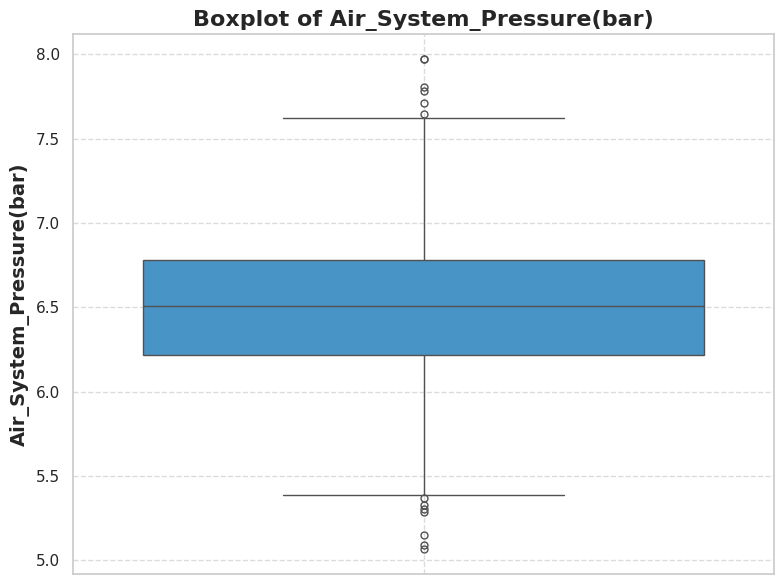

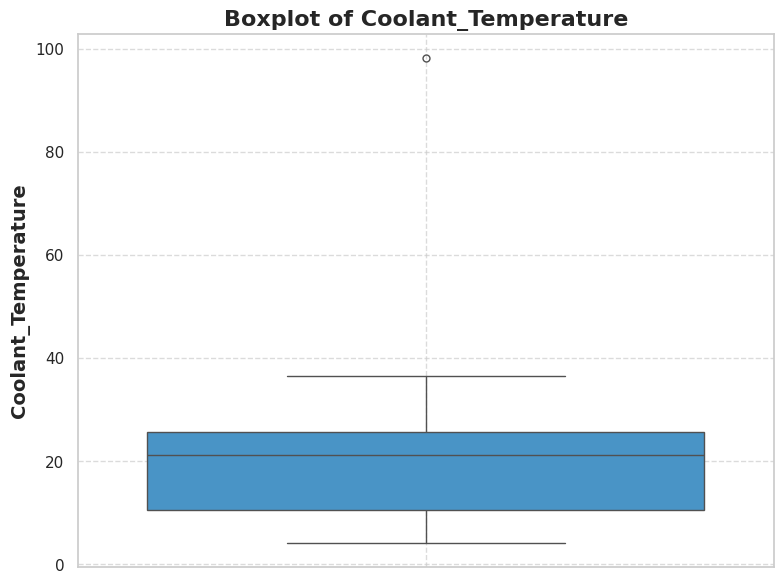

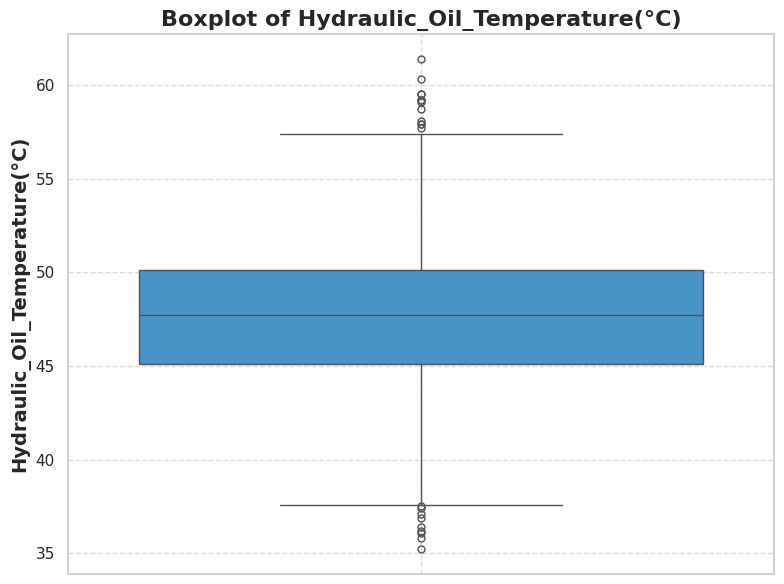

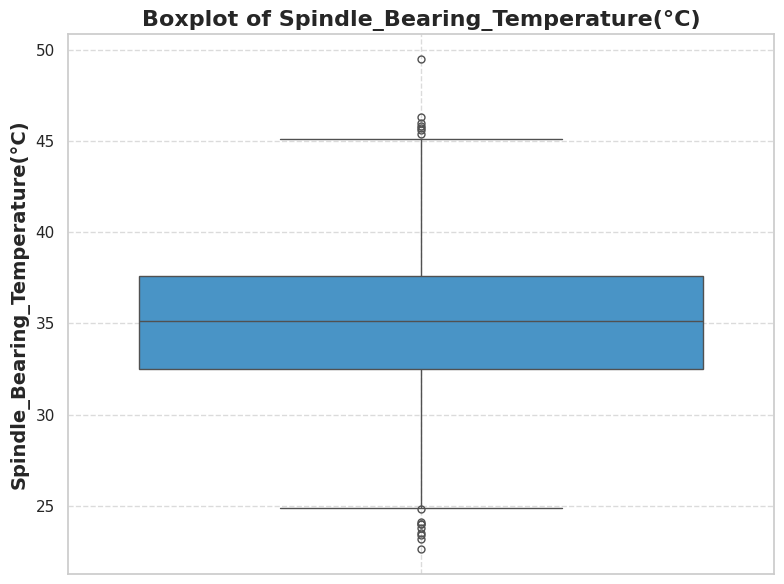

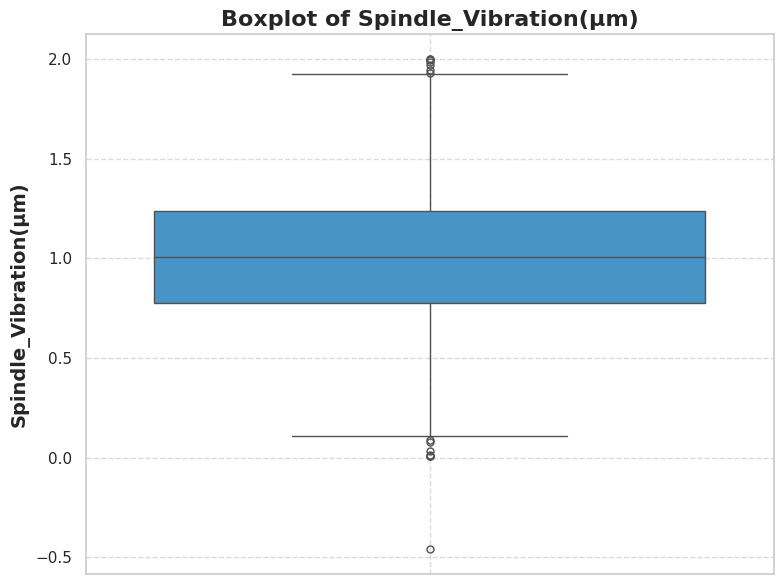

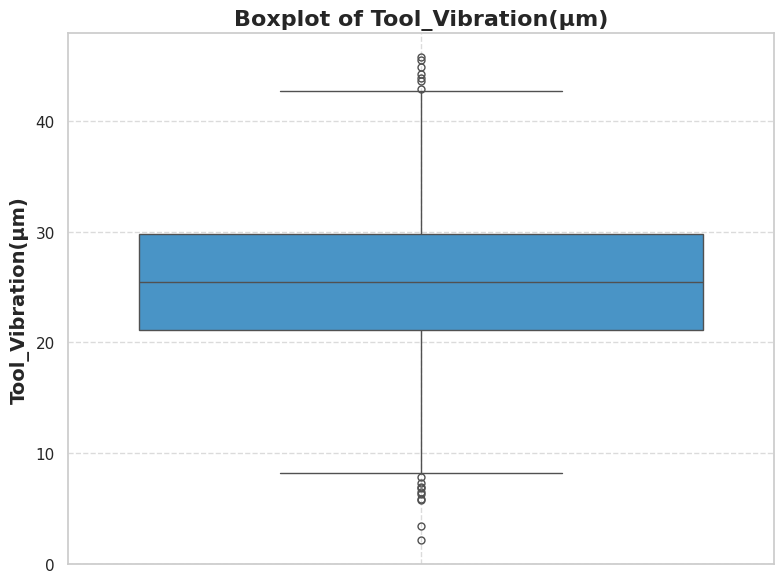

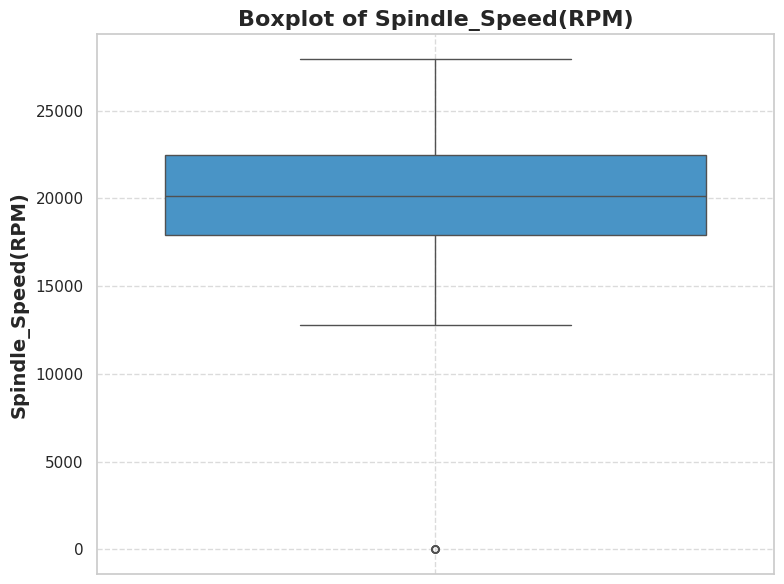

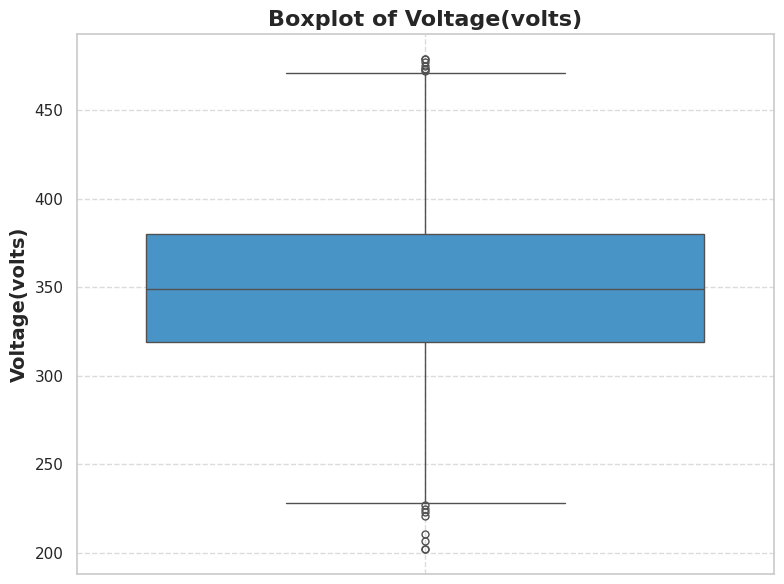

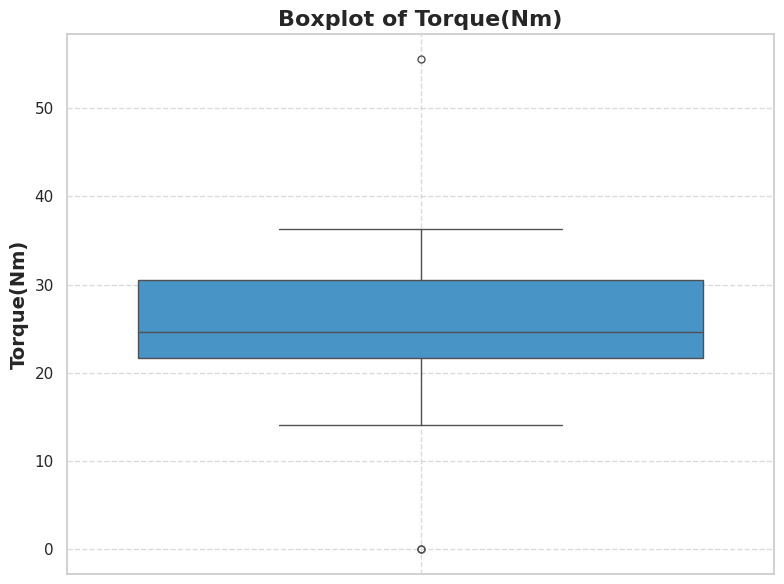

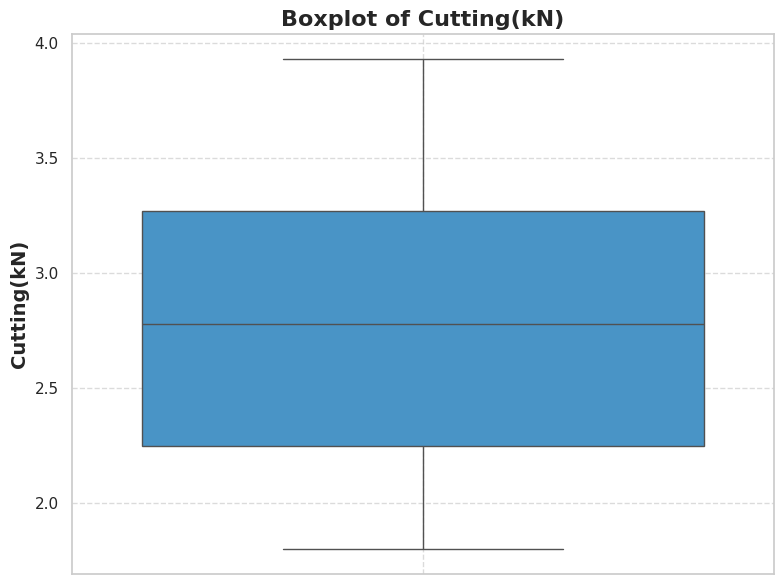

In [96]:
# Plotting Boxplot to view Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create boxplots for each numerical column with improved aesthetics
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    sns.boxplot(y=data[col], color="#3498db", fliersize=5)  # Set color and customize outliers
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')  # Set title with bold font
    plt.xlabel('')  # Remove x-label as we are plotting only one variable per boxplot
    plt.ylabel(col, fontsize=14, fontweight='bold')  # Set y-label with a professional font style
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with a subtle style
    plt.tight_layout()  # Ensure everything fits within the figure
    plt.show()


#### **Insight :There are outliers in almost every columns (no outliers in cutting(kN)).Further step are taken the remove outliers using IQR.**

In [97]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers
Q1 = data['Hydraulic_Pressure(bar)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Hydraulic_Pressure(bar)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 50.060726874999986
Lower Fence: 1.263909687500032
Upper Fence: 201.50681718749996


In [98]:
# Filter the dataset to remove outliers based on the calculated lower and upper fences for 'Hydraulic_Pressure(bar)'
filtered_data_1 = data[(data['Hydraulic_Pressure(bar)'] >= lower_fence) & (data['Hydraulic_Pressure(bar)'] <= upper_fence)]

# Display the first 5 rows of the filtered dataset to verify that outliers have been removed
filtered_data_1.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [99]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Coolant_Pressure(bar)'
Q1 = data['Coolant_Pressure(bar)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Coolant_Pressure(bar)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 1.0559376589999996
Lower Fence: 2.8785570535000007
Upper Fence: 7.102307689499999


In [100]:
# Filter the previously cleaned dataset (filtered_data_1) to remove outliers in 'Coolant_Pressure(bar)'
filtered_data_2 = filtered_data_1[(filtered_data_1['Coolant_Pressure(bar)'] >= lower_fence) & (filtered_data_1['Coolant_Pressure(bar)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Coolant_Pressure(bar)' have been removed
filtered_data_2.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [101]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Air_System_Pressure(bar)'
Q1 = data['Air_System_Pressure(bar)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Air_System_Pressure(bar)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 0.5625638154999999
Lower Fence: 5.3741408252500005
Upper Fence: 7.62439608725


In [102]:
# Filter the previously cleaned dataset (filtered_data_2) to remove outliers in 'Air_System_Pressure(bar)'
filtered_data_3 = filtered_data_2[(filtered_data_2['Air_System_Pressure(bar)'] >= lower_fence) & (filtered_data_2['Air_System_Pressure(bar)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Air_System_Pressure(bar)' have been removed
filtered_data_3.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [103]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Coolant_Temperature'
Q1 = data['Coolant_Temperature'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Coolant_Temperature'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 15.200000000000001
Lower Fence: -12.4
Upper Fence: 48.400000000000006


In [104]:
# Filter the previously cleaned dataset (filtered_data_3) to remove outliers in 'Coolant_Temperature'
filtered_data_4 = filtered_data_3[(filtered_data_3['Coolant_Temperature'] >= lower_fence) & (filtered_data_3['Coolant_Temperature'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Coolant_Temperature' have been removed
filtered_data_4.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [105]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Hydraulic_Oil_Temperature(°C)'
Q1 = data['Hydraulic_Oil_Temperature(°C)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Hydraulic_Oil_Temperature(°C)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 5.0
Lower Fence: 37.6
Upper Fence: 57.6


In [106]:
# Filter the previously cleaned dataset (filtered_data_4) to remove outliers in 'Hydraulic_Oil_Temperature(°C)'
filtered_data_5 = filtered_data_4[(filtered_data_4['Hydraulic_Oil_Temperature(°C)'] >= lower_fence) & (filtered_data_4['Hydraulic_Oil_Temperature(°C)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Hydraulic_Oil_Temperature(°C)' have been removed
filtered_data_5.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [107]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Hydraulic_Oil_Temperature(°C)'
Q1 = data['Hydraulic_Oil_Temperature(°C)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Hydraulic_Oil_Temperature(°C)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 5.0
Lower Fence: 37.6
Upper Fence: 57.6


In [108]:
# Filter the previously cleaned dataset (filtered_data_4) to remove outliers in 'Hydraulic_Oil_Temperature(°C)'
filtered_data_5 = filtered_data_4[(filtered_data_4['Hydraulic_Oil_Temperature(°C)'] >= lower_fence) & (filtered_data_4['Hydraulic_Oil_Temperature(°C)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Hydraulic_Oil_Temperature(°C)' have been removed
filtered_data_5.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [109]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Spindle_Bearing_Temperature(°C)'
Q1 = data['Spindle_Bearing_Temperature(°C)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Spindle_Bearing_Temperature(°C)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 5.100000000000001
Lower Fence: 24.849999999999998
Upper Fence: 45.25


In [110]:
# Filter the previously cleaned dataset (filtered_data_5) to remove outliers in 'Spindle_Bearing_Temperature(°C)'
filtered_data_6 = filtered_data_5[(filtered_data_5['Spindle_Bearing_Temperature(°C)'] >= lower_fence) & (filtered_data_5['Spindle_Bearing_Temperature(°C)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Spindle_Bearing_Temperature(°C)' have been removed
filtered_data_6.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [111]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Spindle_Vibration(µm)'
Q1 = data['Spindle_Vibration(µm)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Spindle_Vibration(µm)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 0.45899999999999996
Lower Fence: 0.08850000000000013
Upper Fence: 1.9244999999999999


In [112]:
# Filter the previously cleaned dataset (filtered_data_6) to remove outliers in 'Spindle_Vibration(µm)'
filtered_data_7 = filtered_data_6[(filtered_data_6['Spindle_Vibration(µm)'] >= lower_fence) & (filtered_data_6['Spindle_Vibration(µm)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Spindle_Vibration(µm)' have been removed
filtered_data_7.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [113]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Tool_Vibration(µm)'
Q1 = data['Tool_Vibration(µm)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Tool_Vibration(µm)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 8.701
Lower Fence: 8.037499999999998
Upper Fence: 42.841499999999996


In [114]:
# Filter the previously cleaned dataset (filtered_data_7) to remove outliers in 'Tool_Vibration(µm)'
filtered_data_8 = filtered_data_7[(filtered_data_7['Tool_Vibration(µm)'] >= lower_fence) & (filtered_data_7['Tool_Vibration(µm)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Tool_Vibration(µm)' have been removed
filtered_data_8.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [115]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Spindle_Speed(RPM)'
Q1 = data['Spindle_Speed(RPM)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Spindle_Speed(RPM)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")

IQR : 4582.75
Lower Fence: 11044.875
Upper Fence: 29375.875


In [116]:
# Filter the previously cleaned dataset (filtered_data_8) to remove outliers in 'Spindle_Speed(RPM)'
filtered_data_9 = filtered_data_8[(filtered_data_8['Spindle_Speed(RPM)'] >= lower_fence) & (filtered_data_8['Spindle_Speed(RPM)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Spindle_Speed(RPM)' have been removed
filtered_data_9.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [117]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Voltage(volts)'
Q1 = data['Voltage(volts)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Voltage(volts)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 61.0
Lower Fence: 227.5
Upper Fence: 471.5


In [118]:
# Filter the previously cleaned dataset (filtered_data_9) to remove outliers in 'Voltage(volts)'
filtered_data_10 = filtered_data_9[(filtered_data_9['Voltage(volts)'] >= lower_fence) & (filtered_data_9['Voltage(volts)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Voltage(volts)' have been removed
filtered_data_10.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [119]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Torque(Nm)'
Q1 = data['Torque(Nm)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Torque(Nm)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 8.847893469999999
Lower Fence: 8.394274575000003
Upper Fence: 43.785848455


In [120]:
# Filter the previously cleaned dataset (filtered_data_10) to remove outliers in 'Torque(Nm)'
filtered_data_11 = filtered_data_10[(filtered_data_10['Torque(Nm)'] >= lower_fence) & (filtered_data_10['Torque(Nm)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Torque(Nm)' have been removed
filtered_data_11.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [121]:
# Calculate the Interquartile Range (IQR) and define the lower and upper fences to detect outliers for 'Cutting(kN)'
Q1 = data['Cutting(kN)'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['Cutting(kN)'].quantile(0.75)  # Third quartile (75th percentile)

IQR = Q3 - Q1  # Interquartile range (spread between the 1st and 3rd quartiles)

# Calculate the lower and upper fences to identify outliers beyond these thresholds
lower_fence = Q1 - 1.5 * IQR  # Lower fence to detect values significantly lower than Q1
upper_fence = Q3 + 1.5 * IQR  # Upper fence to detect values significantly higher than Q3

# Print the results
print(f"IQR : {IQR}")
print(f"Lower Fence: {lower_fence}")
print(f"Upper Fence: {upper_fence}")


IQR : 1.02
Lower Fence: 0.72
Upper Fence: 4.8


In [122]:
# Filter the previously cleaned dataset (filtered_data_11) to remove outliers in 'Cutting(kN)'
filtered_data_12 = filtered_data_11[(filtered_data_11['Cutting(kN)'] >= lower_fence) & (filtered_data_11['Cutting(kN)'] <= upper_fence)]

# Display the first 5 rows of the further filtered dataset to verify that outliers in 'Cutting(kN)' have been removed
filtered_data_12.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [123]:
# Check if there are any missing values (null values) in the filtered dataset (filtered_data_12)
# The result will show the total number of missing values across all columns
filtered_data_12.isnull().sum().sum()

0

In [124]:
filtered_data_12.duplicated().sum()

0

In [125]:
final_data=filtered_data_12.copy()

In [126]:
# Copying data for further normalizing and machine learning prediction models
df_nor=final_data.copy()

# Copying the clean data for exploratory analysis
df_ex=final_data.copy()

# **Exploratory Data Analysis**

### **Univariate Analysis**

In [127]:
# Filtering data only for Failure_machine
filtered_data_failure = df_ex[df_ex['Downtime'] == "Machine_Failure"]
filtered_data_failure.shape

(1172, 16)

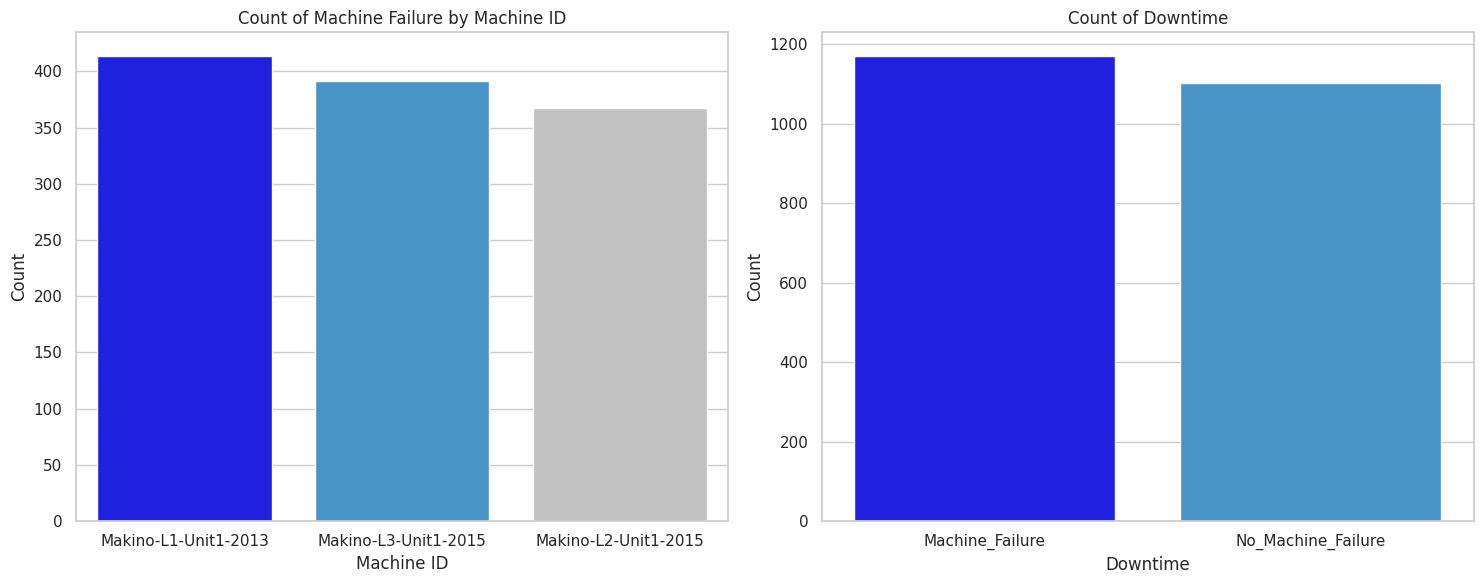

In [128]:
colors = ['blue','#3498db','silver']
# Categorical Data
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_data' is your DataFrame after outlier removal
# Replace 'final_data' with your actual DataFrame name if different

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Machine_ID', data=filtered_data_failure, palette=colors)
plt.title('Count of Machine Failure by Machine ID')
plt.xlabel('Machine ID')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Downtime', data=df_ex, palette=colors)
plt.title('Count of Downtime')
plt.xlabel('Downtime')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### **Insights : Makino-L1_Unit1-2013 has more number of machine Failure than Makino-L3_Unit1-2015 and Makino-L2_Unit1-2015 which can suggest has older machine and technology and more wear-tear comparing to other machine leads to more machine failure count**

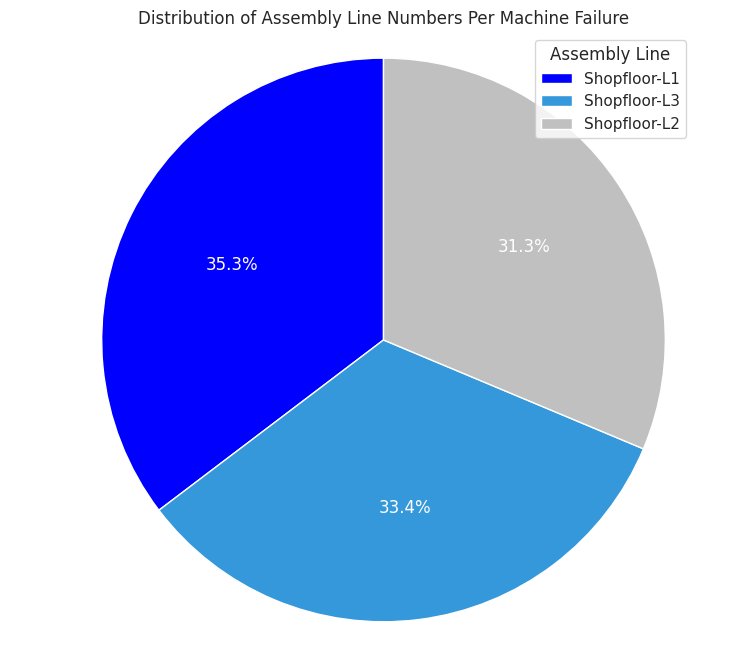

In [129]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data_failure' is your DataFrame
assembly_line_counts = filtered_data_failure['Assembly_Line_No'].value_counts()

# Define custom colors for the pie chart
colors = ['blue','#3498db','silver'] * (len(assembly_line_counts) // 3 + 1)  # Repeat colors if needed

plt.figure(figsize=(8, 8))
plt.pie(assembly_line_counts, labels=assembly_line_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors[:len(assembly_line_counts)], textprops={'color': 'white'})
plt.title('Distribution of Assembly Line Numbers Per Machine Failure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Assembly Line', loc='upper right')  # Added legend

plt.show()


#### **There are almost equal number of machine failure in each assembly line ,but Shopfloor-L1 has more failure count compared to other assembly line.**

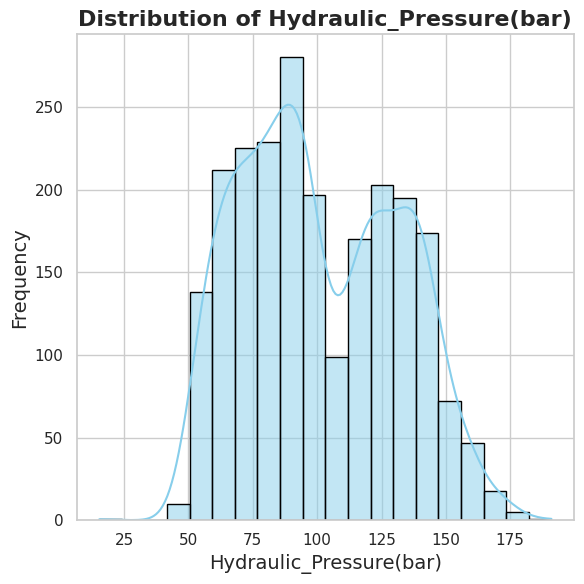

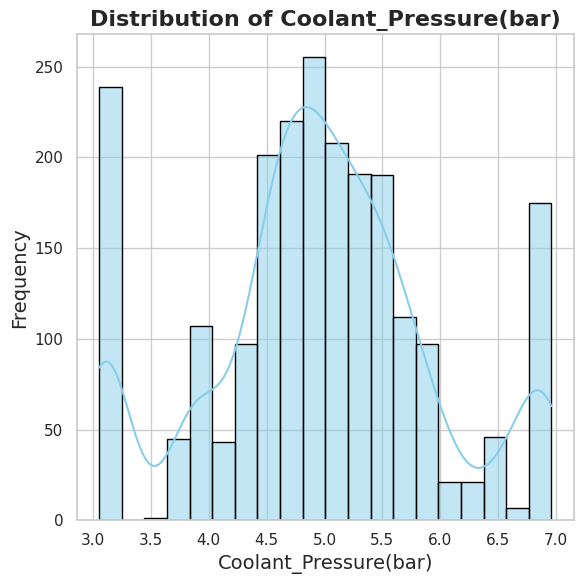

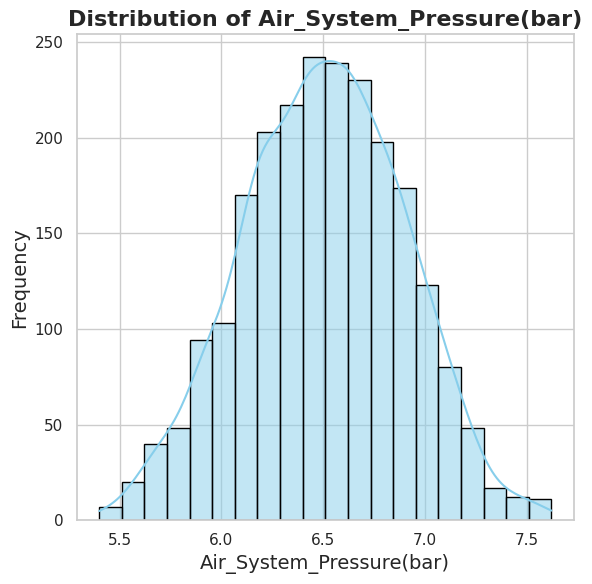

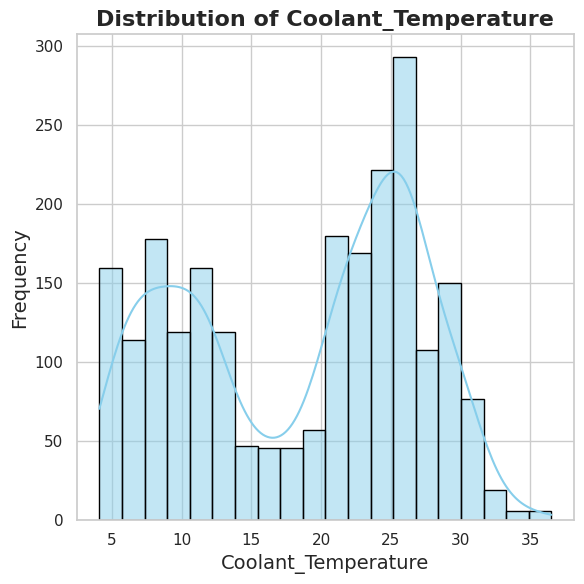

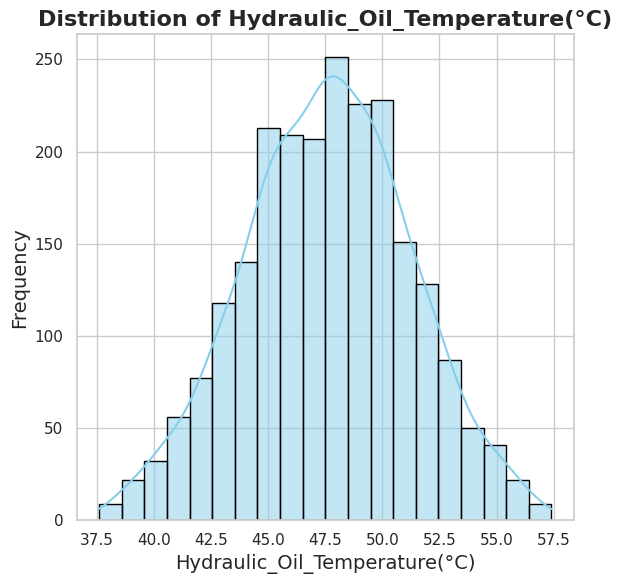

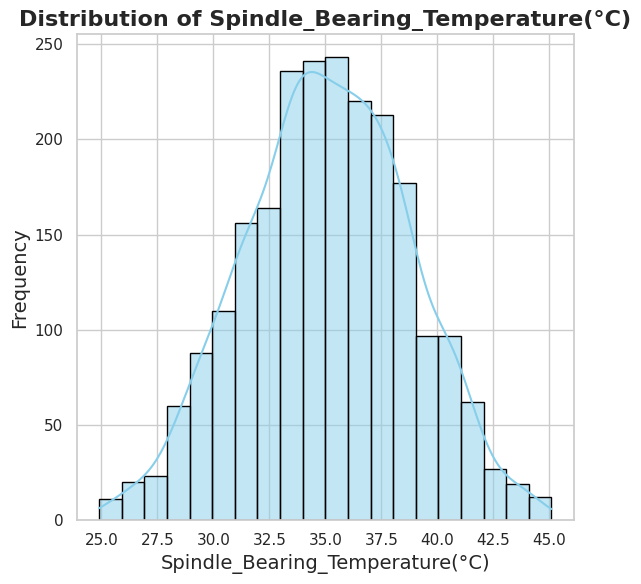

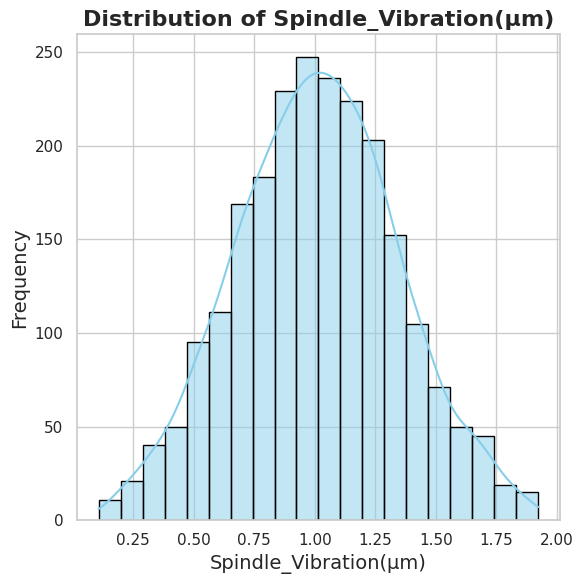

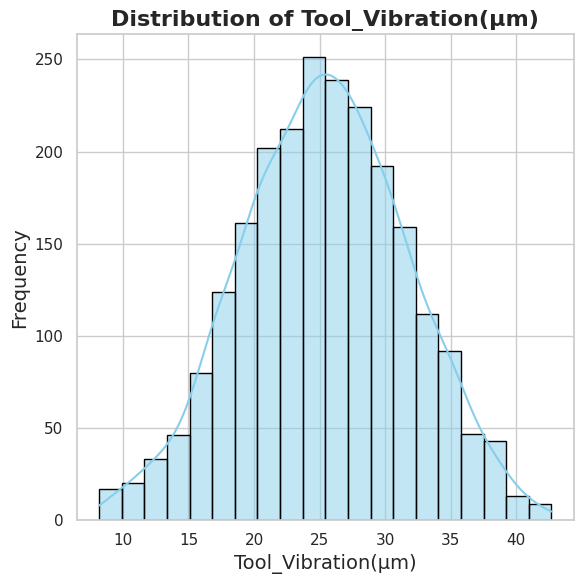

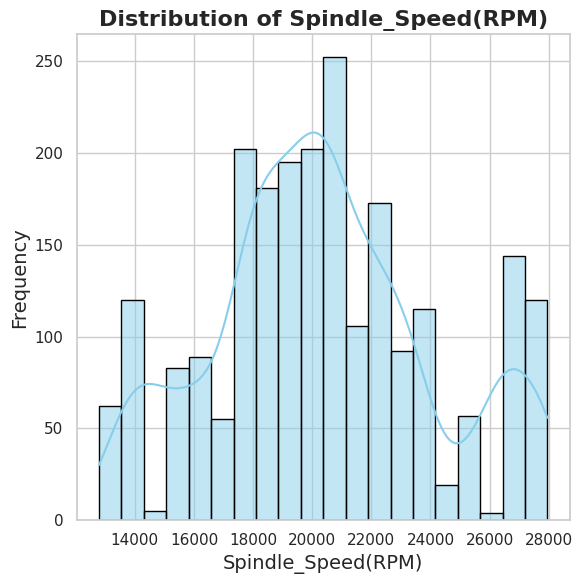

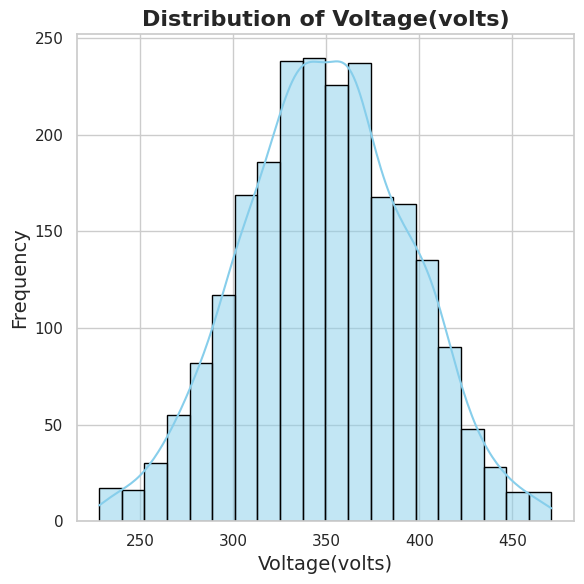

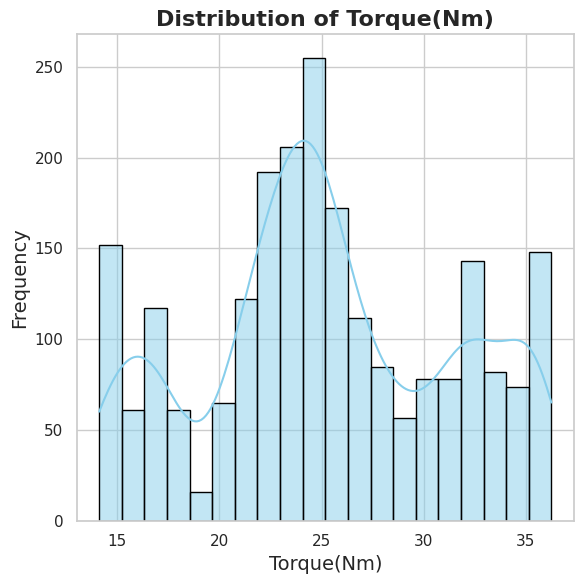

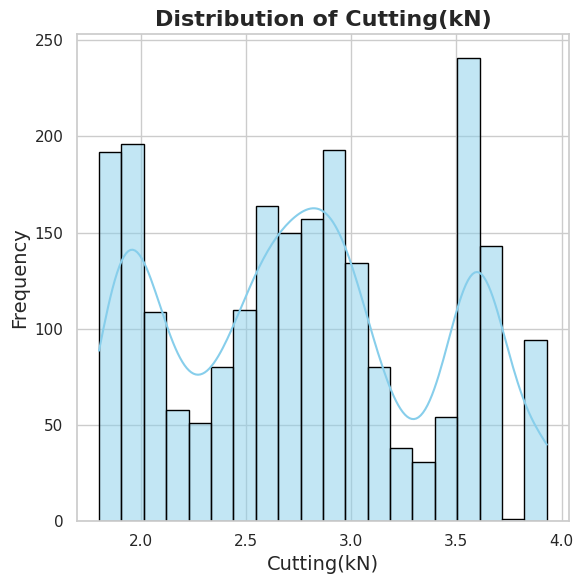

In [130]:
# For numerical columns (univariate analysis)
# Plot histograms to check the distribution of numerical columns
# Customize the aesthetic to create more professional-looking visualizations
import seaborn as sns

# Set style for a clean and professional look
sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(6, 6))  # Set figure size
    sns.histplot(df_ex[col], bins=20, kde=True, color='skyblue', edgecolor='black')  # Plot histogram with kernel density estimate (KDE)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')  # Set title with professional font size and weight
    plt.xlabel(col, fontsize=14)  # Label x-axis with improved font size
    plt.ylabel('Frequency', fontsize=14)  # Label y-axis with improved font size
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()  # Display the histogram

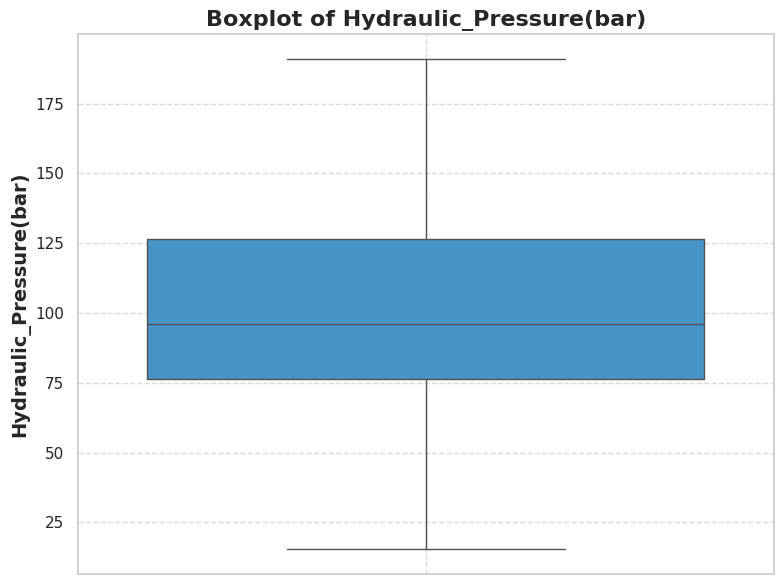

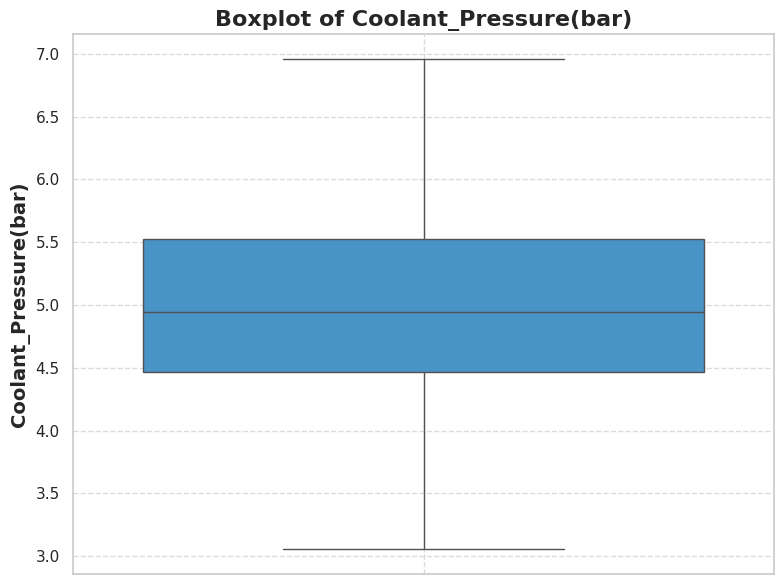

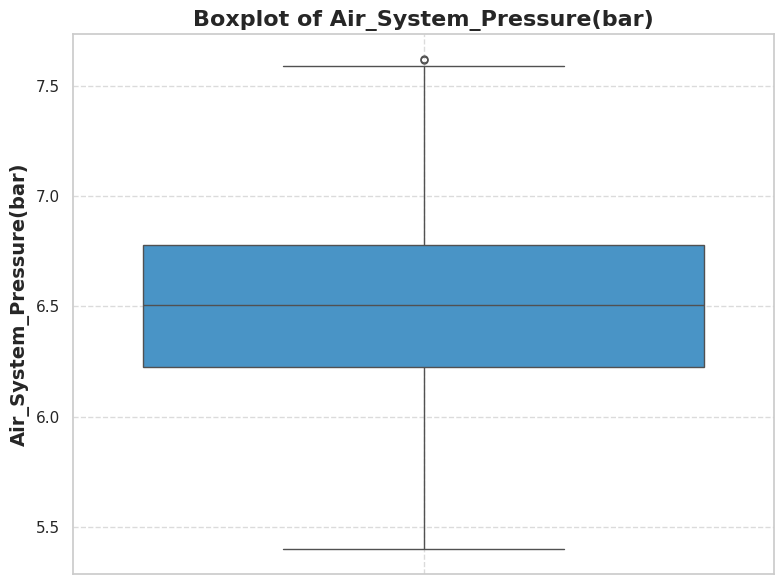

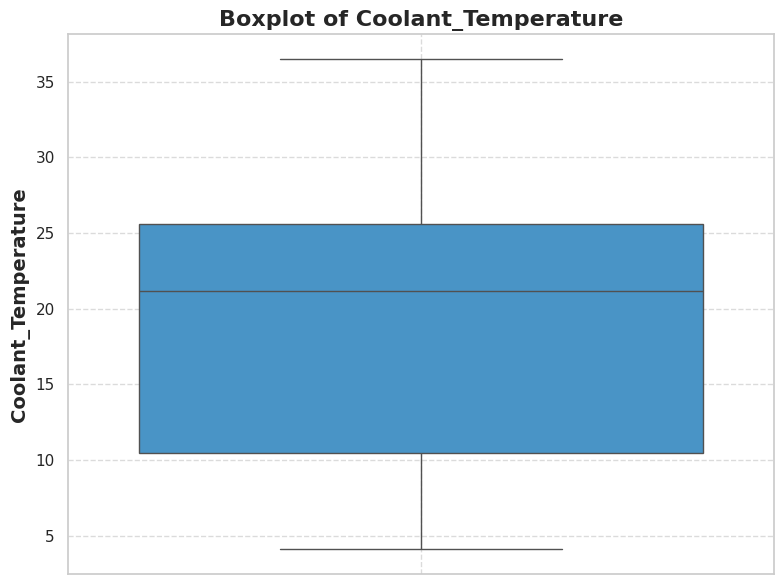

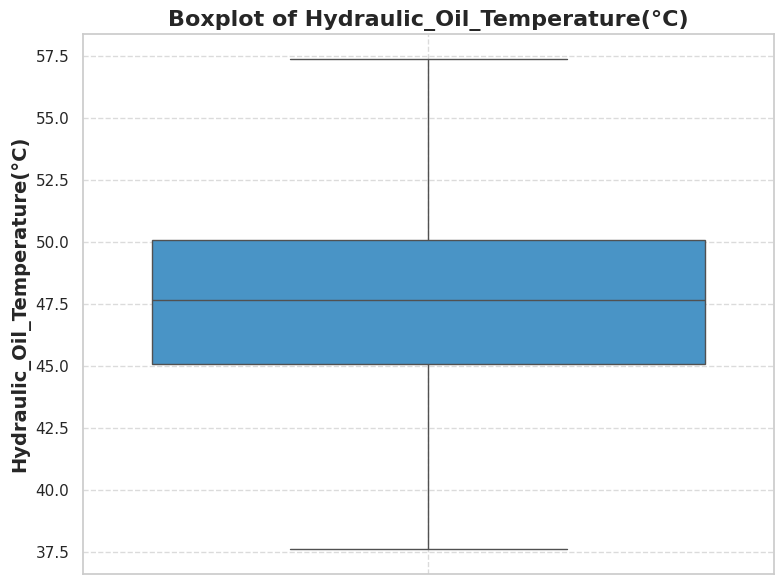

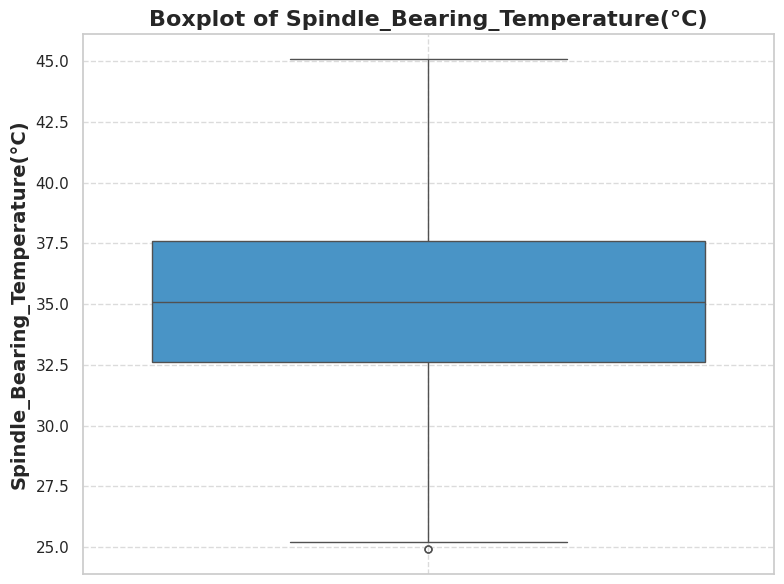

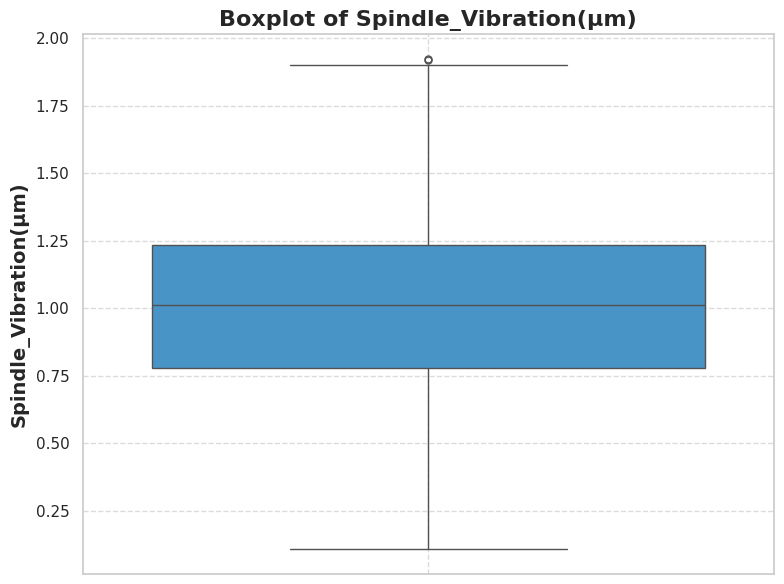

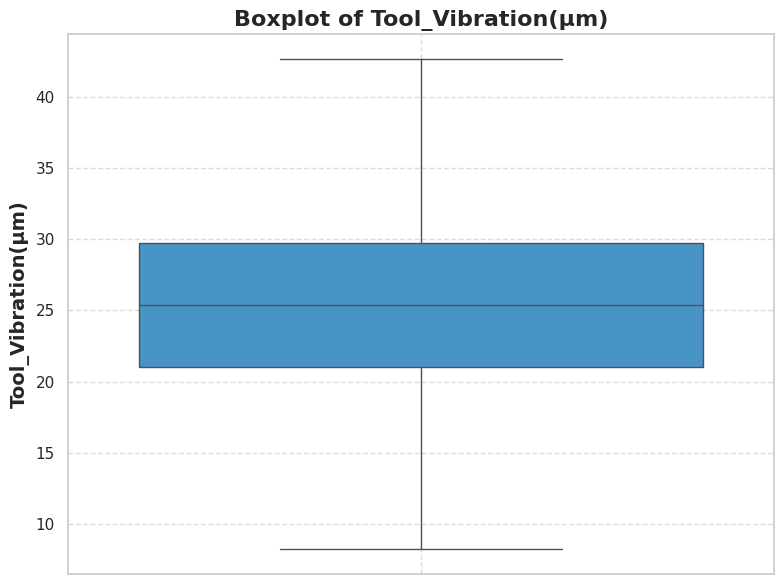

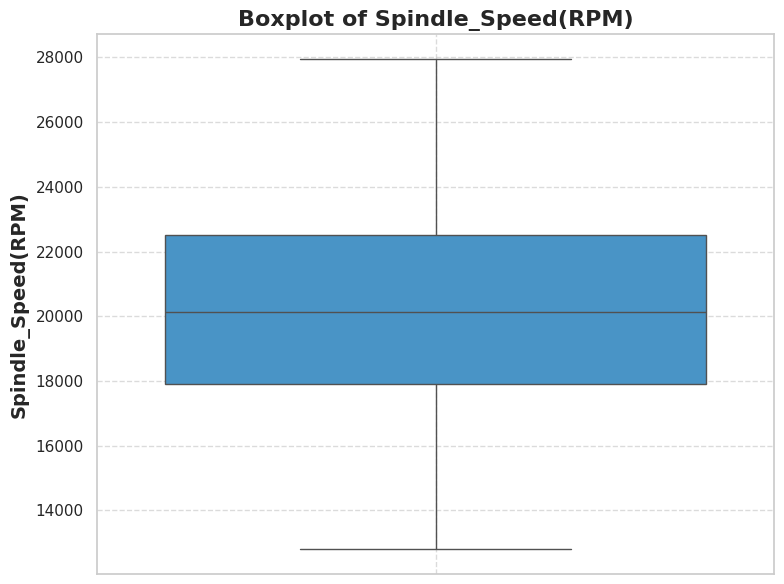

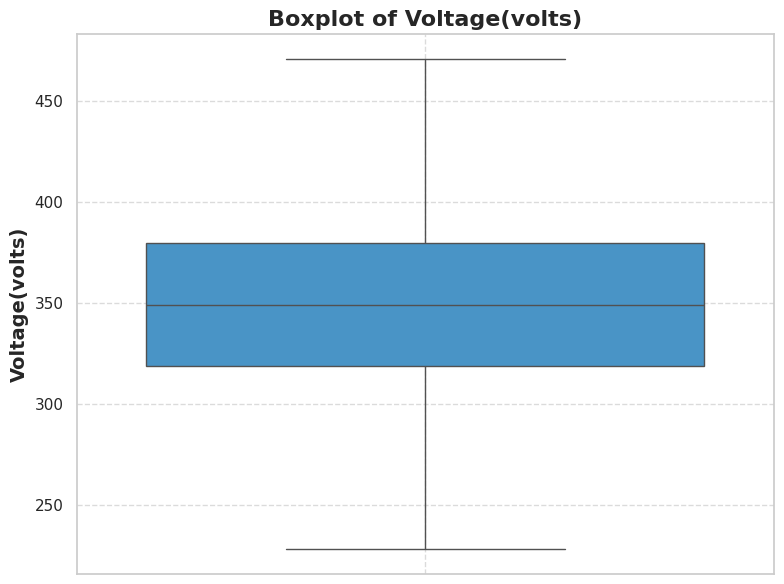

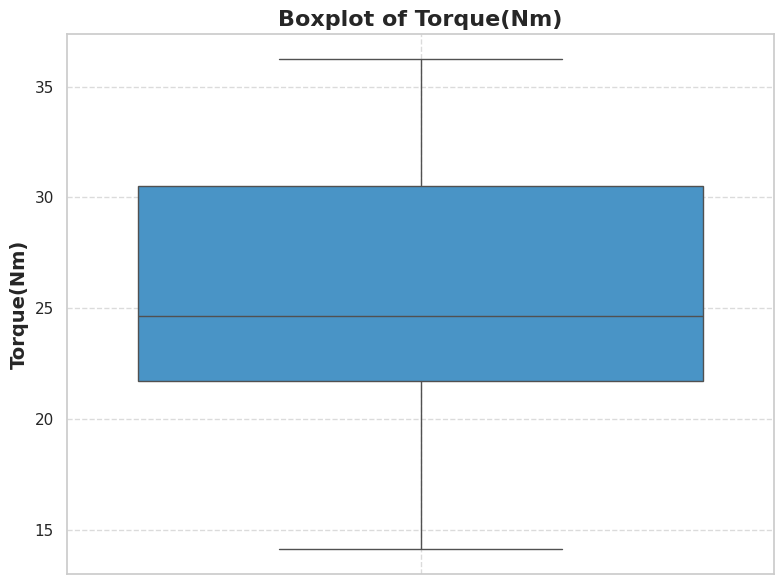

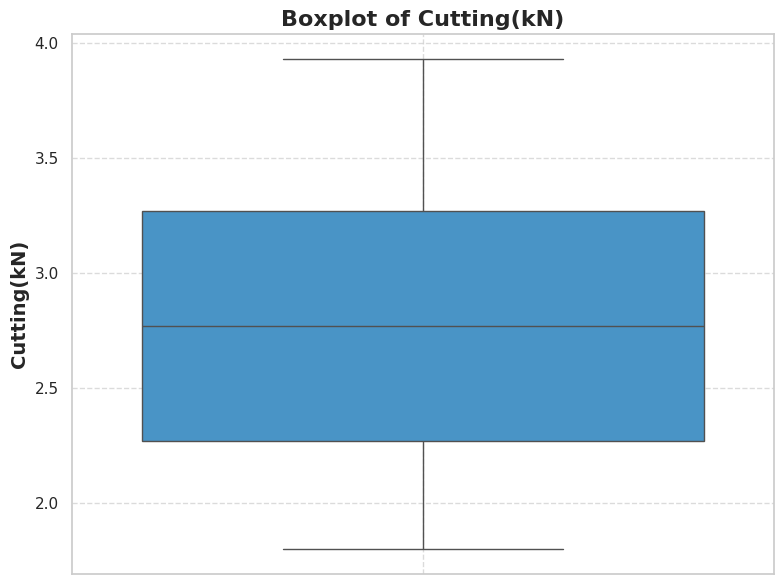

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create boxplots for each numerical column with improved aesthetics
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    sns.boxplot(y=df_ex[col], color="#3498db", fliersize=5)  # Set color and customize outliers
    plt.title(f'Boxplot of {col}', fontsize=16, fontweight='bold')  # Set title with bold font
    plt.xlabel('')  # Remove x-label as we are plotting only one variable per boxplot
    plt.ylabel(col, fontsize=14, fontweight='bold')  # Set y-label with a professional font style
    plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with a subtle style
    plt.tight_layout()  # Ensure everything fits within the figure
    plt.show()


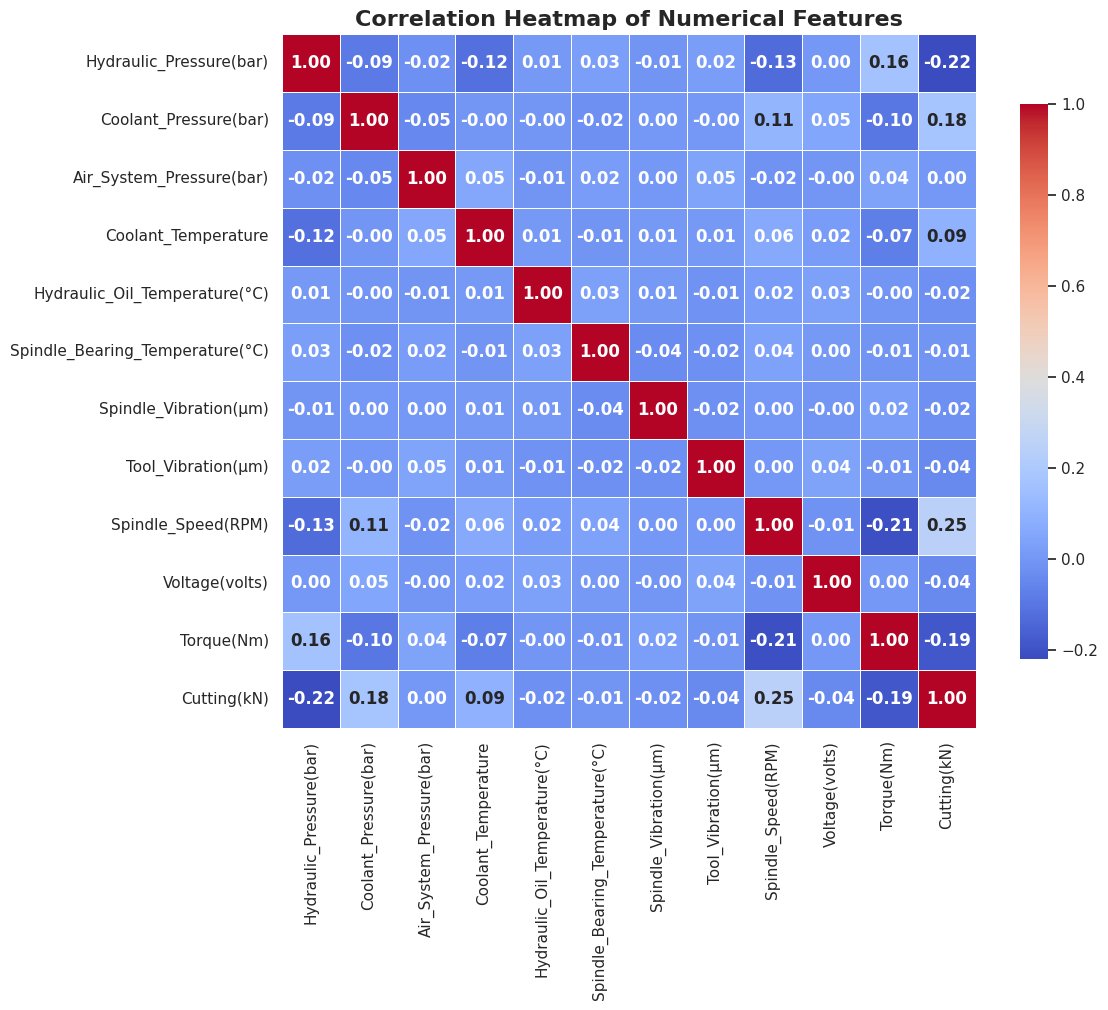

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for a clean and professional look
sns.set(style="whitegrid")

# Create a larger figure for better readability
plt.figure(figsize=(12, 10))

# Generate the correlation matrix
correlation_matrix = df_ex[numerical_cols].corr()

# Plot the heatmap with improved aesthetics
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 12, 'weight': 'bold'}, square=True)

# Title with improved font size and weight
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## **Insights :**


1. **Hydraulic Pressure and Cutting Force**: There is a strong negative correlation between **Hydraulic Pressure** and **Cutting Force** (-0.219), suggesting that as hydraulic pressure decreases, the cutting force may increase. This might indicate a relationship where low hydraulic pressure impacts the cutting performance.

2. **Spindle Speed and Cutting Force**: A moderate positive correlation (0.247) between **Spindle Speed (RPM)** and **Cutting Force** indicates that higher spindle speeds are somewhat associated with increased cutting force, which is typical in machining processes where higher speeds may lead to more forceful cutting.

3. **Tool Vibration and Cutting Force**: There is a weak negative correlation (-0.042) between **Tool Vibration** and **Cutting Force**, suggesting that tool vibration might not have a strong direct effect on cutting force in this dataset. However, further investigation may reveal more complex interactions in certain conditions.

In [133]:
df_ex.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


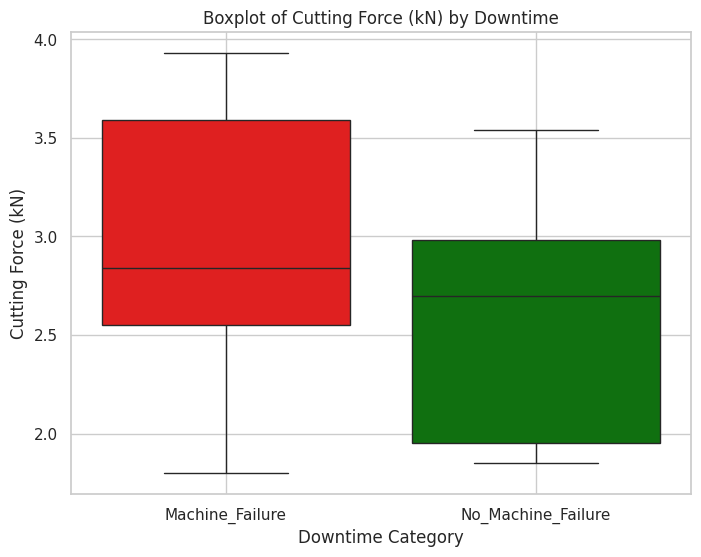

In [167]:
colors = ['red','green']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Downtime', y='Cutting(kN)', data=filtered_data_12, palette=colors)  # Custom color palette
plt.title('Boxplot of Cutting Force (kN) by Downtime')
plt.xlabel('Downtime Category')
plt.ylabel('Cutting Force (kN)')
plt.grid(True)  # Adds gridlines for better readability
plt.show()


# **Insights :**

- Cutting Force (kN) is higher when the machine fails compared to when it is running properly.

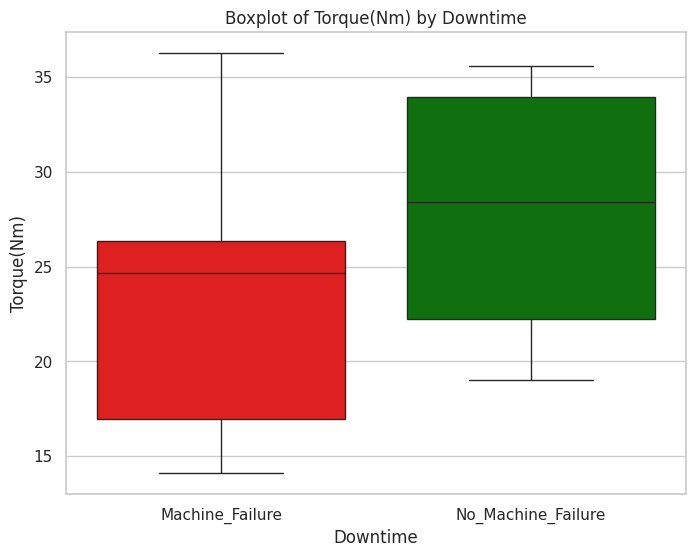

In [166]:
colors = ['red','green']  # Custom color palette

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Downtime', y='Torque(Nm)', data=df_ex, palette=colors)  # Apply custom palette
plt.title('Boxplot of Torque(Nm) by Downtime')
plt.xlabel('Downtime')
plt.ylabel('Torque(Nm)')
plt.show()


# **Insights :**

- Torque is lower when the machine fails compared to when it is running properly.


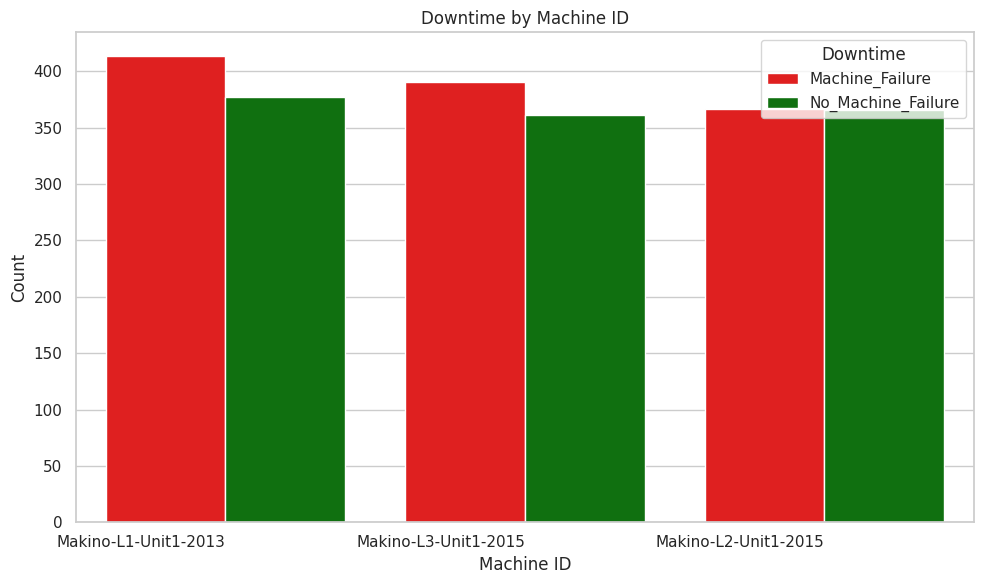

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom color palette
colors = ['red','green']

plt.figure(figsize=(10, 6))
sns.countplot(x='Machine_ID', hue='Downtime', data=df_ex, palette=colors)  # Apply custom palette
plt.title('Downtime by Machine ID')
plt.xlabel('Machine ID')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## **Insights :**

- The Makino-L1-Unit1-2013 experiences more machine failures compared to the Makino-L2-Unit1-2015 and Makino-L1-Unit1-2015, likely due to its older age, higher runtime, and increased wear and tear, while the newer machines benefit from better technology.


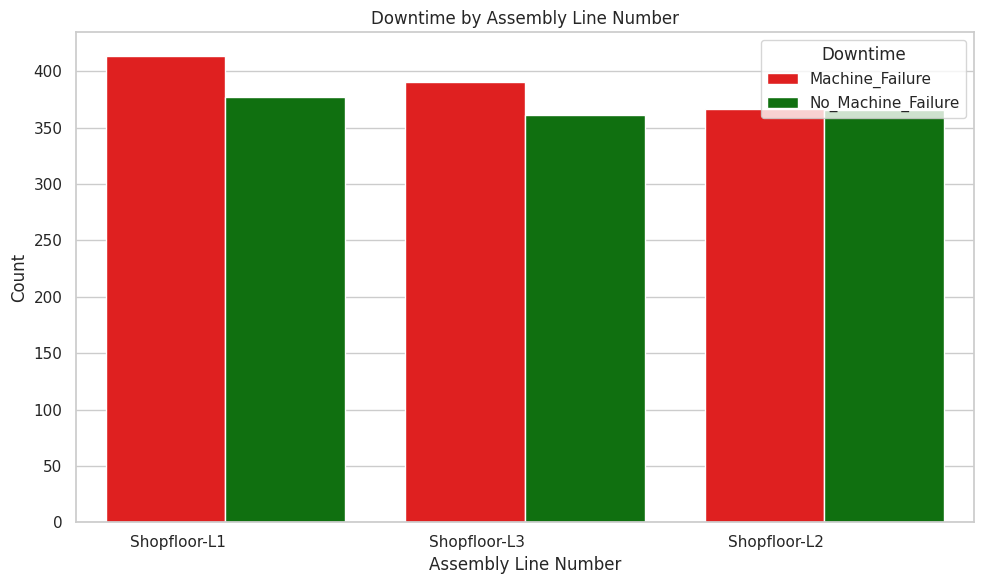

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom color palette
colors = ['red','green']

plt.figure(figsize=(10, 6))
sns.countplot(x='Assembly_Line_No', hue='Downtime', data=df_ex, palette=colors)  # Apply custom colors
plt.title('Downtime by Assembly Line Number')  # Updated title
plt.xlabel('Assembly Line Number')  # Updated x-axis label
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [138]:
# Calculating mean for Coolant_Pressure(bar),Coolant_Temperature,Hydraulic_Pressure(bar),Spindle_Speed(RPM) For Downtime Status
pivot_table_mean_hydraulic_pressure = df_ex.pivot_table(
    values=['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Coolant_Temperature', 'Spindle_Speed(RPM)'],
    index='Downtime',
    aggfunc='mean'
)

pivot_table_mean_hydraulic_pressure

,Coolant_Pressure(bar),Coolant_Temperature,Hydraulic_Pressure(bar),Spindle_Speed(RPM)
Downtime,,,,
Machine_Failure,5.128642,19.952133,84.923712,21402.465870
No_Machine_Failure,4.764367,17.047192,118.589874,19204.616848


### Insights from the Data:

1. **Coolant Pressure (bar)**:  
   - **Machine Failure:** 5.13 bar  
   - **No Machine Failure:** 4.76 bar  
   **Insight:** Higher coolant pressure during machine failure may indicate operational strain or an inefficient cooling system.  
   **Action:** Optimize coolant pressure levels to prevent excess strain and improve cooling efficiency.

2. **Coolant Temperature (°C)**:  
   - **Machine Failure:** 19.95°C  
   - **No Machine Failure:** 17.05°C  
   **Insight:** Elevated coolant temperature during failure suggests inadequate heat dissipation or increased thermal load on the system.  
   **Action:** Improve heat dissipation mechanisms and monitor coolant temperature regularly.

3. **Hydraulic Pressure (bar)**:  
   - **Machine Failure:** 84.92 bar  
   - **No Machine Failure:** 118.59 bar  
   **Insight:** Lower hydraulic pressure during machine failure may indicate insufficient force or leakage in the hydraulic system.  
   **Action:** Inspect for hydraulic leaks, optimize pressure levels, and ensure system integrity to prevent failures.

4. **Spindle Speed (RPM)**:  
   - **Machine Failure:** 21,402 RPM  
   - **No Machine Failure:** 19,204 RPM  
   **Insight:** Higher spindle speed during failures suggests potential overloading or mechanical stress on the spindle.  
   **Action:** Set optimal speed limits, and analyze spindle operation during high-speed intervals to reduce wear and tear.

### Strategic Recommendations:
- **Predictive Maintenance:** Use this data to train a predictive model that monitors these parameters to flag potential failures.  
- **System Optimization:** Focus on coolant, hydraulic, and spindle systems to achieve operational stability and prevent machine downtime.  
- **Process Balancing:** Evaluate machine usage and workload to avoid overburdening systems.

<Figure size 1200x600 with 0 Axes>

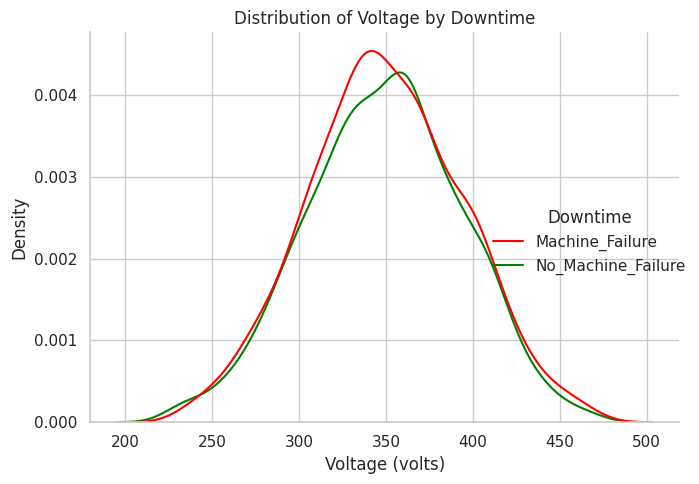

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
colors = ['red','green']

plt.figure(figsize=(12, 6))  # Adjust the figure size to accommodate the plot
sns.displot(data=filtered_data_12, x="Voltage(volts)", hue="Downtime", kind="kde", palette=colors)  # Apply custom colors
plt.title('Distribution of Voltage by Downtime')  # Title
plt.xlabel('Voltage (volts)')  # X-axis label
plt.ylabel('Density')
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


## **Insights :**

- Voltage Distribution of machine failure is lower mean votage than machine runing properly.

In [140]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Specify numerical columns to normalize
numerical_cols = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
                  'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
                  'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
                  'Torque(Nm)', 'Cutting(kN)']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
df_nor[numerical_cols] = scaler.fit_transform(df_nor[numerical_cols])

# Display summary statistics to confirm normalization
print(df_nor[numerical_cols].describe())


       Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2276.000000            2276.000000   
mean                  0.489133               0.485938   
std                   0.172136               0.251263   
min                   0.000000               0.000000   
25%                   0.346461               0.362495   
50%                   0.460436               0.483596   
75%                   0.632178               0.632510   
max                   1.000000               1.000000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2276.000000          2276.000000   
mean                   0.496039             0.445773   
std                    0.177480             0.257402   
min                    0.000000             0.000000   
25%                    0.370917             0.197531   
50%                    0.497970             0.527778   
75%                    0.621533             0.663580   
max                    1.000000       

In [141]:
# Select multiple columns using a list of column names
df_nor = df_nor[['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
                  'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
                  'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
                  'Torque(Nm)', 'Cutting(kN)', 'Downtime']]
df_nor.head()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,0.317145,0.993113,0.398636,0.663580,0.424242,0.420792,0.651982,0.530474,0.863867,0.440329,0.449106,0.835681,Machine_Failure
1,0.626183,0.482086,0.358921,0.962963,0.494949,0.480198,0.702093,0.495175,0.465950,0.576132,0.004195,0.413146,Machine_Failure
2,0.317601,0.968977,0.565400,0.277778,0.156566,0.400990,0.667401,0.649761,0.465621,0.399177,0.448833,0.821596,Machine_Failure
3,0.705933,0.389312,0.522613,0.626543,0.333333,0.777228,0.281388,0.655064,0.373986,0.543210,0.530602,0.821596,Machine_Failure
4,0.257205,0.982737,0.333941,0.000000,0.489899,0.321782,0.482379,0.502188,0.905663,0.518519,0.515061,0.821596,Machine_Failure


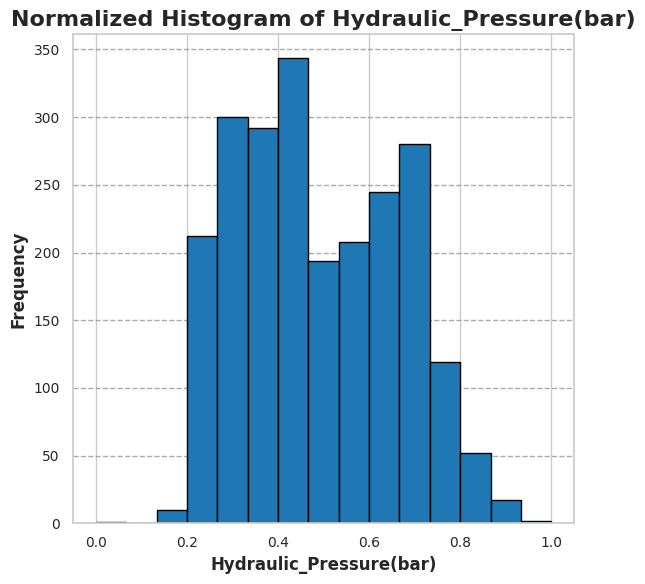

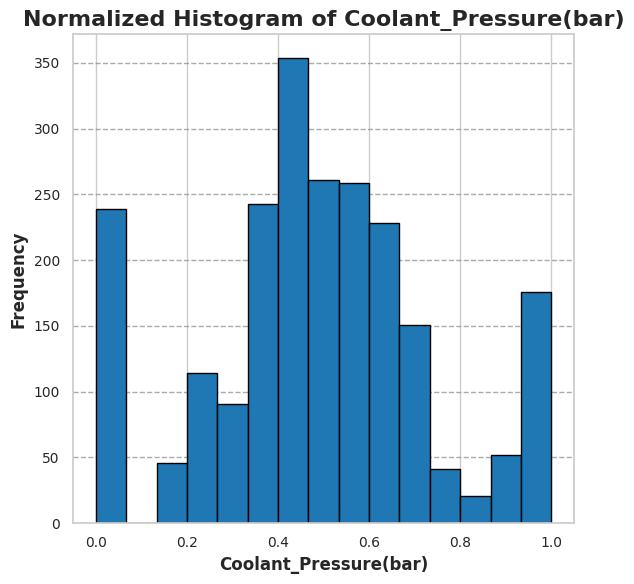

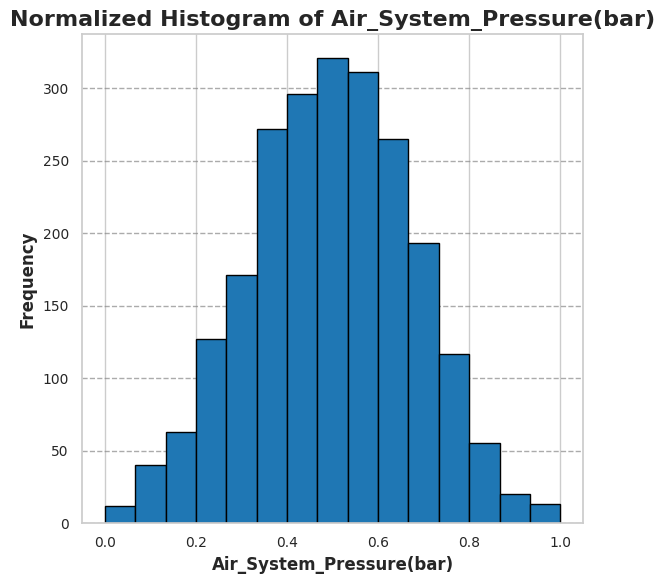

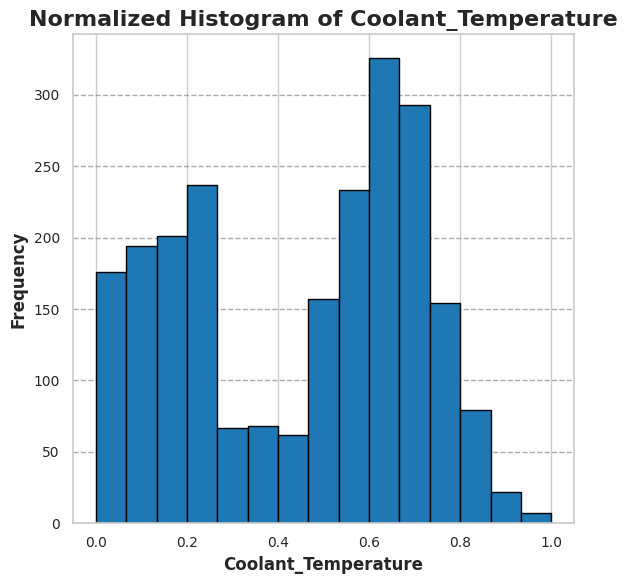

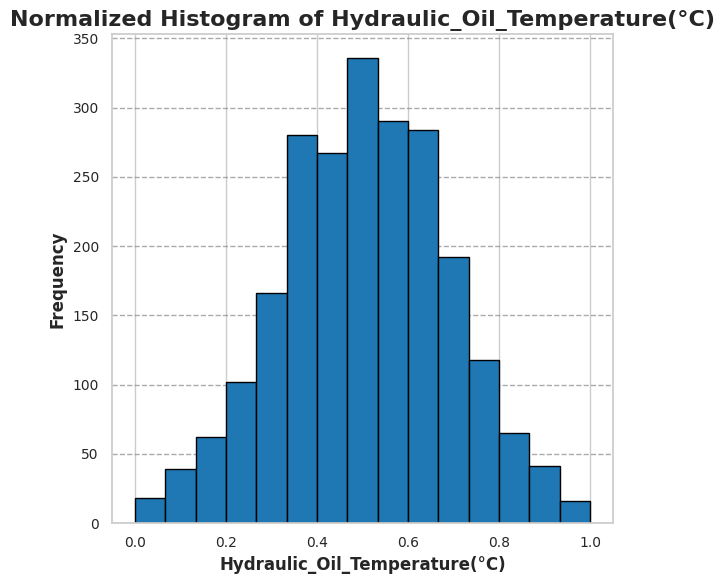

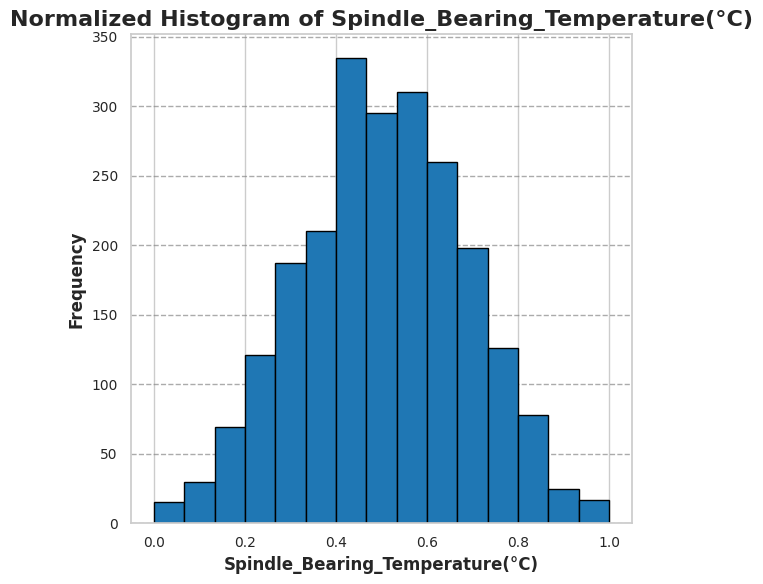

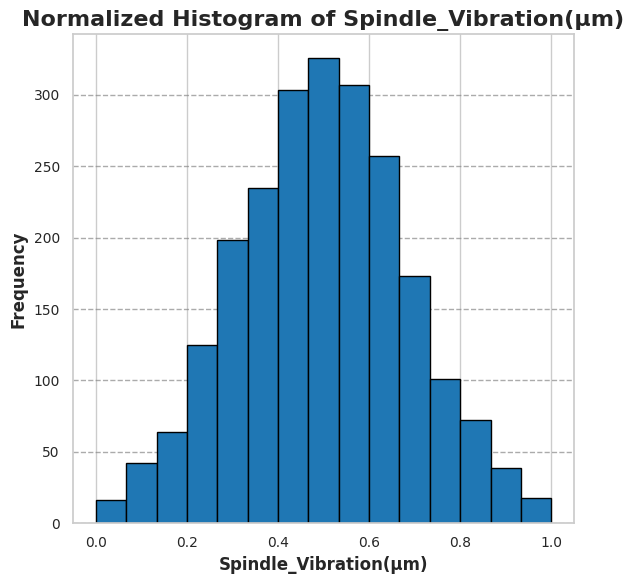

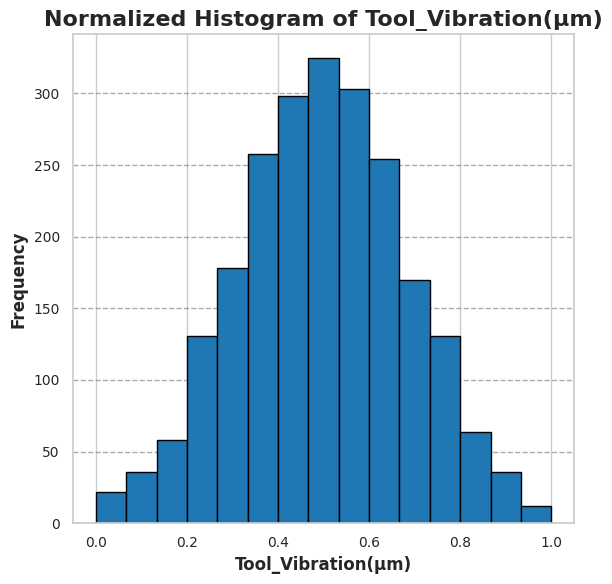

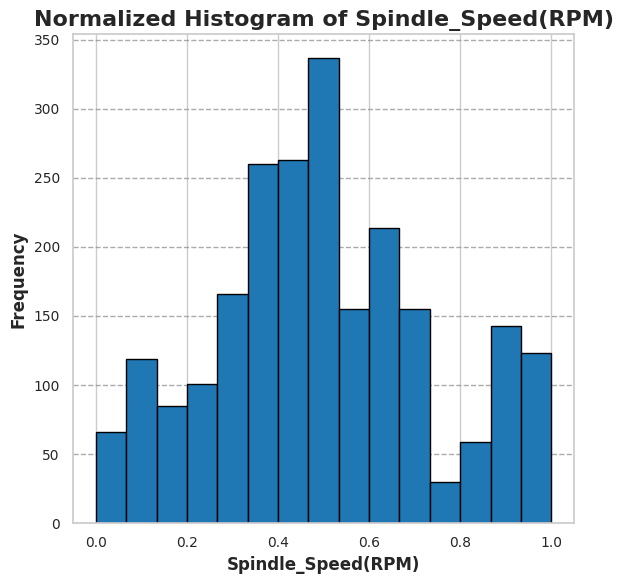

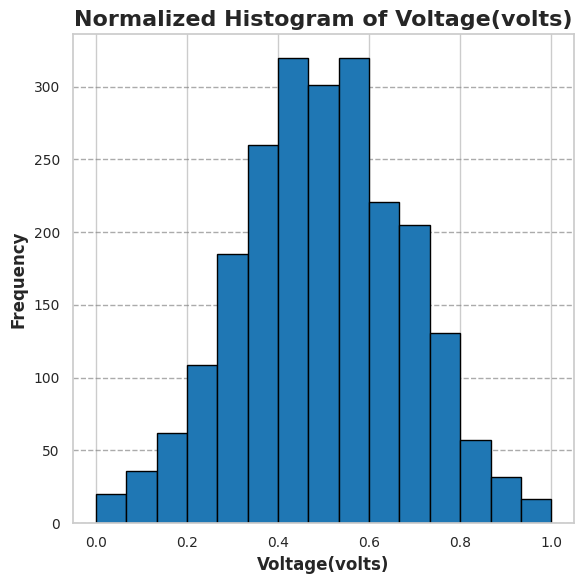

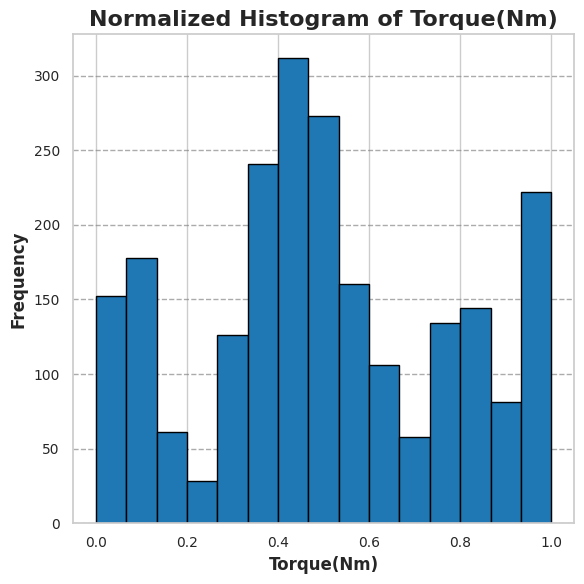

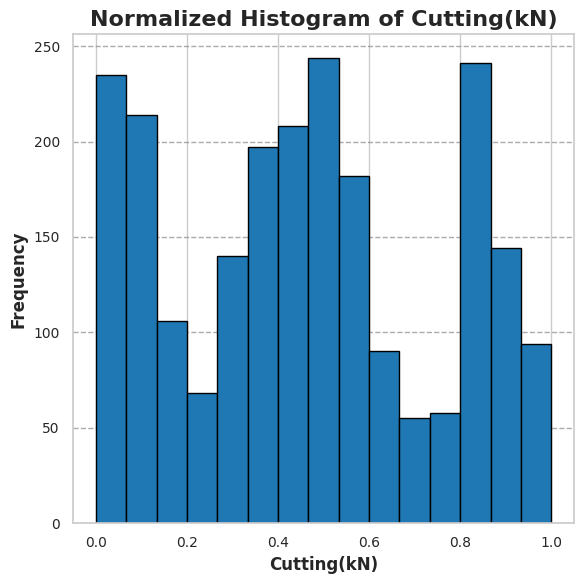

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms to check distributions
for col in numerical_cols:
    plt.figure(figsize=(6, 6))

    # Plot histogram with customized aesthetics
    df_nor[col].hist(bins=15, color='#1f77b4', edgecolor='black')  # Using a more refined color palette
    plt.title(f'Normalized Histogram of {col}', fontsize=16, fontweight='bold')  # Enhanced title styling
    plt.xlabel(col, fontsize=12, fontweight='bold')  # Stronger label styling
    plt.ylabel('Frequency', fontsize=12, fontweight='bold')  # Stronger label styling

    # Grid and layout enhancements
    plt.grid(axis='y', linestyle='--', alpha=0.7, color='#888888')  # Subtle gray gridlines for cleaner look
    plt.xticks(fontsize=10)  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks

    # Show the plot
    plt.tight_layout()  # Ensures proper layout without overlapping elements
    plt.show()


# **Task**

### **Objective: Predict whether a machine will fail or not based on various features that affect its performance. This prediction can be used for preventive maintenance to reduce downtime and improve operational efficiency.**



# **Prediction Model Building**

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target variable
df_nor['Downtime'] = df_nor['Downtime'].map({'Machine_Failure': 1, 'No_Machine_Failure': 0})

df_nor.head()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,0.317145,0.993113,0.398636,0.663580,0.424242,0.420792,0.651982,0.530474,0.863867,0.440329,0.449106,0.835681,1
1,0.626183,0.482086,0.358921,0.962963,0.494949,0.480198,0.702093,0.495175,0.465950,0.576132,0.004195,0.413146,1
2,0.317601,0.968977,0.565400,0.277778,0.156566,0.400990,0.667401,0.649761,0.465621,0.399177,0.448833,0.821596,1
3,0.705933,0.389312,0.522613,0.626543,0.333333,0.777228,0.281388,0.655064,0.373986,0.543210,0.530602,0.821596,1
4,0.257205,0.982737,0.333941,0.000000,0.489899,0.321782,0.482379,0.502188,0.905663,0.518519,0.515061,0.821596,1


In [144]:
X = df_nor[['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Air_System_Pressure(bar)','Coolant_Temperature','Hydraulic_Oil_Temperature(°C)','Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)','Tool_Vibration(µm)','Spindle_Speed(RPM)','Voltage(volts)','Torque(Nm)','Cutting(kN)']]
y = df_nor['Downtime']

# Independent Varirable
print(X.head())


   Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  Air_System_Pressure(bar)  \
0                 0.317145               0.993113                  0.398636   
1                 0.626183               0.482086                  0.358921   
2                 0.317601               0.968977                  0.565400   
3                 0.705933               0.389312                  0.522613   
4                 0.257205               0.982737                  0.333941   

   Coolant_Temperature  Hydraulic_Oil_Temperature(°C)  \
0             0.663580                       0.424242   
1             0.962963                       0.494949   
2             0.277778                       0.156566   
3             0.626543                       0.333333   
4             0.000000                       0.489899   

   Spindle_Bearing_Temperature(°C)  Spindle_Vibration(µm)  Tool_Vibration(µm)  \
0                         0.420792               0.651982            0.530474   
1                   

In [145]:
# shape of Independent Varirable
print(f"Shape of X : {X.shape}")

Shape of X : (2276, 12)


In [146]:
# Independent Varirable
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: Downtime, dtype: int64


In [147]:
# shape of Dependent Varirable
print(f"Shape of Y : {y.shape}")

Shape of Y : (2276,)


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
# Independent Varirable split data
print(X_train.head())
print(f"Shape of X_train : {X_train.shape}")

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
1357                 0.432985               0.897555   
39                   0.203981               0.460533   
494                  0.716179               0.643561   
1664                 0.723124               0.975255   
2140                 0.317145               0.643561   

      Air_System_Pressure(bar)  Coolant_Temperature  \
1357                  0.539786             0.808642   
39                    0.443058             0.706790   
494                   0.718190             0.055556   
1664                  0.426678             0.608025   
2140                  0.545886             0.688272   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
1357                       0.661616                         0.435644   
39                         0.191919                         0.826733   
494                        0.191919                         0.341584   
1664                       0.313131         

In [150]:
# Independent Varirable split data
print(X_test.head())
print(f"Shape of X_train : {X_test.shape}")

      Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
2267                 0.743730               0.432503   
1457                 0.346916               0.340319   
954                  0.251114               0.205147   
433                  0.693676               0.587270   
678                  0.836235               0.804876   

      Air_System_Pressure(bar)  Coolant_Temperature  \
2267                  0.230548             0.706790   
1457                  0.402766             0.879630   
954                   0.600265             0.074074   
433                   0.529399             0.601852   
678                   0.582765             0.830247   

      Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Temperature(°C)  \
2267                       0.191919                         0.653465   
1457                       0.898990                         0.376238   
954                        0.550505                         0.613861   
433                        0.570707         

In [151]:
# Dependent Varirable split data
print(y_train.head())
print(f"Shape of X_train : {y_train.shape}")

1357    1
39      1
494     1
1664    1
2140    1
Name: Downtime, dtype: int64
Shape of X_train : (1593,)


In [152]:
# Dependent Varirable split data
print(y_test.head())
print(f"Shape of X_train : {y_test.shape}")

2267    1
1457    1
954     1
433     0
678     0
Name: Downtime, dtype: int64
Shape of X_train : (683,)


In [153]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# DEFINE THE MODELS
models = {
    'Logistic Regression': LogisticRegression(max_iter=100),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# LOOP THROUGH MODELS, TRAIN, AND EVALUATE
for name, model in models.items():
    # TRAIN THE MODEL
    model.fit(X_train, y_train)

    # MAKE PREDICTIONS
    y_pred = model.predict(X_test)

    # EVALUATE THE MODEL
    print(f"============   Model: {name}  =============")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100,2)} %")
    print("\n")
    print("\n")


============   Model: Logistic Regression  =============
Confusion Matrix:
 [[288  55]
 [ 45 295]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       343
           1       0.84      0.87      0.86       340

    accuracy                           0.85       683
   macro avg       0.85      0.85      0.85       683
weighted avg       0.85      0.85      0.85       683

Accuracy Score: 85.36 %




============   Model: Gaussian Naive Bayes  =============
Confusion Matrix:
 [[283  60]
 [ 42 298]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       343
           1       0.83      0.88      0.85       340

    accuracy                           0.85       683
   macro avg       0.85      0.85      0.85       683
weighted avg       0.85      0.85      0.85       683

Accuracy Score: 85.07 %




============   Model: Decision Tree  =============
Confusion Matrix:
 [[333  10]
 [  9 331]

# **Business and Strategic Insights Based on Model Evaluations :**

#### **1. Logistic Regression**
- **Accuracy:** 85.36%  
- **Precision and Recall:** Comparable for both classes (0 and 1), with a balanced f1-score of 0.85 for both.  
- **Insights:**
  - **Linear separability:** Logistic Regression performs well, suggesting the data has some degree of linear separability.
  - **Business Use Case:** Suitable for cases requiring explainability, such as regulatory compliance or customer churn prediction, as the model provides clear insights into feature contributions.
  - **Actionable Next Step:** If accuracy needs improvement, explore feature engineering or higher-order polynomial terms to enhance the model's ability to capture non-linear patterns.

---

#### **2. Gaussian Naive Bayes**
- **Accuracy:** 85.07%  
- **Precision and Recall:** Balanced performance, with slightly better recall for class 1 (88%).  
- **Insights:**
  - **Independence Assumption:** Naive Bayes performs similarly to Logistic Regression, indicating that the feature independence assumption holds reasonably well.
  - **Business Use Case:** Effective for quick classification tasks where speed is critical, such as email spam detection or risk assessments in finance.
  - **Actionable Next Step:** Analyze the independence assumption further. If dependencies exist between features, try feature selection or PCA to improve performance.

---

#### **3. Decision Tree**
- **Accuracy:** 97.07%  
- **Precision and Recall:** Both are extremely high for both classes (0.97).  
- **Insights:**
  - **Overfitting Potential:** The model’s performance might indicate overfitting, as Decision Trees tend to capture noise in the training data.
  - **Business Use Case:** Useful for scenarios where interpretability is critical, such as understanding decision pathways for medical diagnoses or production line issues.
  - **Actionable Next Step:** Evaluate performance using cross-validation or pruning to avoid overfitting. Decision Tree's high performance suggests strong signal in the data.

---

#### **4. Random Forest**
- **Accuracy:** 99.00%  
- **Precision and Recall:** Near-perfect performance for both classes.  
- **Insights:**
  - **Robustness:** Random Forest achieves the best performance, balancing precision and recall. It effectively captures both linear and non-linear relationships.
  - **Business Use Case:** Ideal for high-stakes decisions, such as fraud detection, where near-perfect classification is critical.
  - **Actionable Next Step:** Analyze feature importance from the Random Forest model to identify the most impactful predictors for business decisions. Consider deploying this model in production if interpretability is not a primary concern.



# **Recommendations :**

1. **Proactive Maintenance Scheduling**  
   - Machines with high hydraulic pressure, coolant pressure, or temperatures (e.g., hydraulic oil, spindle bearing) near failure events should be prioritized for maintenance.  
   - Regularly monitor and address machines with abnormal vibrations (spindle or tool) to prevent unplanned downtime.

2. **Optimization of Operating Parameters**  
   - Maintain hydraulic pressure and coolant pressure within optimal ranges identified from successful operations.  
   - Analyze torque and spindle speed combinations to determine the most efficient operational thresholds.

3. **Assembly Line Improvements**  
   - Focus on assembly lines with higher machine failure rates or downtime. Address potential systemic issues such as operator errors, calibration needs, or environmental factors.

4. **Monitoring Cutting Force and Spindle Speed**  
   - Machines with excessive cutting force or irregular spindle speed variations should be evaluated for tooling issues or improper settings.

5. **Vibration Control Measures**  
   - Investigate machines with high spindle or tool vibrations to reduce wear and tear on components.  
   - Implement vibration monitoring systems to provide real-time alerts for anomalies.

6. **Upgrade Older Machines**  
   - Machines like “Makino-L1-Unit1-2013” with recurrent failures might require upgrades or replacements to improve reliability and performance.

7. **Root Cause Analysis for Failures**  
   - Conduct a detailed root cause analysis on failure-prone machines and assembly lines, focusing on environmental conditions, operator interventions, and machine setup.

8. **Energy Efficiency Monitoring**  
   - Analyze voltage consumption trends for machines to identify energy efficiency opportunities. Implement measures to optimize power usage.

9. **Training and Documentation**  
   - Provide operators with training on identifying early warning signs (e.g., abnormal temperatures or vibrations).  
   - Create detailed logs of machine performance metrics to track and predict failure trends.

10. **Implementation of Predictive Maintenance**  
   - Use advanced analytics or machine learning models to predict failures based on historical data trends like downtime, pressure, temperature, and vibration metrics.



# **Conclusion**

The dataset offers significant insights into the operational performance and failure patterns of manufacturing machines, highlighting critical factors that influence reliability and productivity. Key operational parameters such as hydraulic pressure, coolant pressure, spindle speed, torque, cutting force, and temperature metrics provide early warning signs for potential machine failures. Abnormal indicators like excessive vibrations, elevated temperatures, and irregular pressures should be continuously monitored to reduce unplanned downtime and improve machine reliability. Identifying and addressing these high-risk factors proactively can prevent costly breakdowns and optimize machine performance.

Assembly lines with recurring failures or frequent downtime require targeted interventions. Routine maintenance schedules, root cause analysis, and adjustments to operating conditions can help resolve underlying issues. Machines operating in extreme conditions or those showing consistent anomalies may need upgrades or replacements to ensure productivity and efficiency. Predictive maintenance, powered by data analytics and real-time monitoring, enables organizations to anticipate potential failures and extend machine lifespans, minimizing operational disruptions.

Incorporating data-driven strategies like trend analysis, energy optimization, and workforce training can further enhance operational efficiency. Optimizing critical parameters such as spindle speed and cutting force reduces wear and tear, while monitoring energy usage ensures cost-effectiveness and sustainability. With comprehensive performance monitoring and a culture of continuous improvement, the organization can achieve long-term reliability, reduce operational costs, and foster sustainable manufacturing practices. By leveraging these insights, the organization is better equipped to make informed decisions, enhance productivity, and maintain a competitive edge in the industry.